In [1]:
import findspark
findspark.init()
import pyspark
import re
from random import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
port = 4040 + hash(os.getcwd().split("/")[2])%200

config = pyspark.SparkConf().set('spark.executor.memory', '2G')\
            .set('spark.cores.max', '50')\
            .set('spark.port.maxRetries','200')\
            .set('spark.ui.port', port)\
            .set('spark.master', 'spark://polyp1:7077')\
            .set('spark.app.name', "project1")

#sc = pyspark.SparkContext(conf = config)
ss = pyspark.sql.SparkSession.builder.config(conf = config).getOrCreate()

# print ss.conf.get('spark.app.name')
# print ss.conf.get('spark.master')

In [2]:
import os
port = 4040 + hash(os.getcwd().split("/")[2])%200

config = pyspark.SparkConf().set('spark.executor.memory', '512M')\
            .set('spark.cores.max', '2')\
            .set('spark.port.maxRetries','200')\
            .set('spark.ui.port', port)\
            .set('spark.master', 'spark://polyp1:7077')\
            .set('spark.app.name', "project1")

#sc = pyspark.SparkContext(conf = config)
ss = pyspark.sql.SparkSession.builder.config(conf = config).getOrCreate()

# print ss.conf.get('spark.app.name')
# print ss.conf.get('spark.master')

In [4]:
import os
port = 4040 + hash(os.getcwd().split("/")[2])%200

config = pyspark.SparkConf().set('spark.executor.memory', '512M')\
            .set('spark.cores.max', '2')\
            .set('spark.port.maxRetries','200')\
            .set('spark.ui.port', port)\
            .set('spark.master', 'spark://polyp1:7077')\
            .set('spark.app.name', "project1")

#sc = pyspark.SparkContext(conf = config)
ss = pyspark.sql.SparkSession.builder.config(conf = config).getOrCreate()

# print ss.conf.get('spark.app.name')
# print ss.conf.get('spark.master')

We will use the data for Green Taxis in September 2015. All the files are located in /scratch/ISE495/taxi data folder. The data is in two CSV format files. The headers for each column are stored in a text file. You can visit this page for additional details about the headers.

In [3]:
#### Input data
sc = ss.sparkContext
#taxi = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09_small.csv")
header = sc.textFile("/scratch/ISE495/taxi_data/header.txt")
taxi = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09.csv")

In [22]:
header.take(21)

[u'VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type']

In [6]:
taxi.take(5)

[u'2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979484558105469,40.684955596923828,-73.97943115234375,40.685020446777344,1,.00,7.8,0,0,1.95,0,,0,9.75,1,2',
 u'2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010795593261719,40.912216186523438,-74.010780334472656,40.912212371826172,1,.00,45,0,0,0,0,,0,45,1,2',
 u'2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921409606933594,40.766708374023438,-73.914413452148438,40.764686584472656,1,.59,4,0.5,0.5,0.5,0,,0.3,5.8,1,1',
 u'2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.92138671875,40.766677856445313,-73.931427001953125,40.771583557128906,1,.74,5,0.5,0.5,0,0,,0.3,6.3,2,1',
 u'2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482482910156,40.714046478271484,-73.944412231445313,40.714729309082031,1,.61,5,0.5,0.5,0,0,,0.3,6.3,2,1']

## Exploratory data analysis

In [7]:
rows = taxi.map(lambda x: x.split(",")).count()

In [8]:
column = header.flatMap(lambda x:x.split(',')).collect()
columns=0
for i in column:
    columns = columns + 1

In [9]:
print header.take(19) ## Column Names
print "Row Count: ", rows ## Row Count
print "Column Count: ", columns ## Column Count

[u'VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type']
Row Count:  1494926
Column Count:  21


There are 1494926 rows and 21 columns.

### Descriptive Statistical Analysis
Let's first take a look at the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

- the count of that variable
- the mean
- the standard deviation (std)
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value

In [15]:
## Descriptive Statistical Analysis about Fare amount
fare_amount = taxi.map(lambda x: float(x.split(",")[14]))
print "max: %d" %(fare_amount.max()), "min: %d" %(fare_amount.min()), "mean: %d" %(fare_amount.mean()), "standard deviation: %d" %(fare_amount.stdev())

max: 300 min: -50 mean: 1 standard deviation: 2


In [16]:
## Descriptive Statistical Analysis about Tip_amount
Tip_amount = taxi.map(lambda x: float(x.split(",")[17]))
print "max: %d" %(Tip_amount.max()), "min: %d" %(Tip_amount.min()), "mean: %d" %(Tip_amount.mean()), "standard deviation: %d" %(Tip_amount.stdev())

max: 0 min: 0 mean: 0 standard deviation: 0


In [17]:
## Descriptive Statistical Analysis about Tolls_amount
Tolls_amount = taxi.map(lambda x: float(x.split(",")[18]))
print "max: %d" %(Tolls_amount.max()), "min: %d" %(Tolls_amount.min()), "mean: %d" %(Tolls_amount.mean()), "standard deviation: %d" %(Tolls_amount.stdev())

max: 581 min: -475 mean: 15 standard deviation: 11


In [18]:
## Descriptive Statistical Analysis about Ehail_fee
Ehail_fee = taxi.map(lambda x: float(x.split(",")[19]))
print "max: %d" %(Ehail_fee.max()), "min: %d" %(Ehail_fee.min()), "mean: %d" %(Ehail_fee.mean()), "standard deviation: %d" %(Ehail_fee.stdev())

max: 5 min: 1 mean: 1 standard deviation: 0


In [19]:
## Descriptive Statistical Analysis about Passenger_count
Passenger_count = taxi.map(lambda x: float(x.split(",")[9]))
print "max: %d" %(Passenger_count.max()), "min: %d" %(Passenger_count.min()), "mean: %d" %(Passenger_count.mean()), "standard deviation: %d" %(Passenger_count.stdev())

max: 9 min: 0 mean: 1 standard deviation: 1


In [20]:
## Summary Statistics for Trip_distance
Trip_distance = taxi.map(lambda x: float(x.split(",")[10]))
print "max: %d" %(Trip_distance.max()), "min: %d" %(Trip_distance.min()), "mean: %d" %(Trip_distance.mean()), "standard deviation: %d" %(Trip_distance.stdev())

max: 603 min: 0 mean: 2 standard deviation: 3


## Task-1 - Frequent Pattern Mining

Task-1
Figure-1 is a visualization for a small number of trips. It gives us a rough sense where the trips happen.
Since the Hudson River, which is the boundary of New Jersey and NYC in this area, is quite straight, we can
use a line to model this natural boundary. The approximated line in latitude (y) and longitude (x) can be represented as
y = 1.323942 * x+138.669195:
If a location satisfies y > 1.323942 * x+138.669195, it?s in New Jersey. If a location satisfies y < 1.323942 * x+
138.669195, it's in Manhattan. After such processing, we can get Figure-2. In this way, we can better utilize the
pick-up and drop-off latitude-longitude data.
In this task, you are expected to group all trips into the following four categories, NJ -> NJ, NJ -> NYC, NYC
-> NJ, NYC -> NYC. Can you build some association rules on intra- vs. inter-borough traffic? What story does it tell
about how New Yorkers use their green taxis? For example, in which hour of the day, there would be more inter-borough
traffic than intra-borough traffic? Is there a particular time of the day and a category for which the fare is above average?
For those NYC ! NYC trips, are people more likely to take taxis from uptown to downtown or from downtown to
uptown? There are many interesting stories in the data, feel free to discover some. Again, you can create new features
as needed.
PS: you can also think about the profitability for drivers? When to drive, etc. ?

In [10]:
## LET'S CHECK Pickup_longitude!!
print taxi.map(lambda x:x.split(",")).map(lambda x: x[5]).take(3)

[u'-73.979484558105469', u'-74.010795593261719', u'-73.921409606933594']


We need to group all trips into the following four categories, NJ -> NJ, NJ -> NYC, NYC -> NJ, NYC -> NYC. 

In [11]:
print taxi.take(2)

[u'2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979484558105469,40.684955596923828,-73.97943115234375,40.685020446777344,1,.00,7.8,0,0,1.95,0,,0,9.75,1,2', u'2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010795593261719,40.912216186523438,-74.010780334472656,40.912212371826172,1,.00,45,0,0,0,0,,0,45,1,2']


If a location satisfies y > 1.323942 x+138.669195, it?s in New Jersey("NJ"). If a location satisfies y < 1.323942 * x+ 138.669195, it's in Manhattan("NYC"). After such processing.

In [12]:
def Boundary_NY_NJ(s):
    t = s.split(",") # t is taxi data file
    x = float(t[5]) # -73.979484558105469
    y = float(t[6]) # 40.684955596923828
    a = float(t[7]) # 73.97943115234375
    b = float(t[8]) # 40.685020446777344    
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"
    return pick_up, drop_off
NJ_NY_RDD = taxi.map(Boundary_NY_NJ)
print NJ_NY_RDD.take(20)

[('NYC', 'NYC'), ('NJ', 'NJ'), ('NYC', 'NYC'), ('NYC', 'NYC'), ('NYC', 'NYC'), ('NJ', 'NJ'), ('NYC', 'NYC'), ('NJ', 'NJ'), ('NYC', 'NYC'), ('NYC', 'NYC'), ('NYC', 'NYC'), ('NYC', 'NYC'), ('NJ', 'NJ'), ('NJ', 'NJ'), ('NJ', 'NJ'), ('NJ', 'NJ'), ('NYC', 'NYC'), ('NYC', 'NYC'), ('NYC', 'NYC'), ('NJ', 'NJ')]


In [13]:
print NJ_NY_RDD.map(lambda x: (x, 1) ).reduceByKey(lambda a, b: a + b)

PythonRDD[21] at RDD at PythonRDD.scala:48


In [14]:
print NJ_NY_RDD.map(lambda x: (x, 1) ).reduceByKey(lambda a, b: a + b).collect()

[(('NYC', 'NJ'), 144110), (('NYC', 'NYC'), 864553), (('NJ', 'NJ'), 449130), (('NJ', 'NYC'), 37133)]


We can calculate how many trips are in each category: NJ -> NJ, NJ -> NYC, NYC -> NJ, NYC -> NYC.

In [23]:
trip = taxi.map(Boundary_NY_NJ).map(lambda x: (x,1)).reduceByKey(lambda a,b: a + b).map(lambda x: x[0]).collect()
trip_count = taxi.map(Boundary_NY_NJ).map(lambda x: (x,1)).reduceByKey(lambda a,b: a + b).map(lambda x: x[1]).collect()
trip_category = list()
count_trip = list()
for i in trip_count:
    NJ_NY_trip = float(i)
    count_trip.append(NJ_NY_trip) 
for i in trip:
    NJ_NY_count = str(i)
    trip_category.append(NJ_NY_count)  
print trip_category, count_trip

["('NYC', 'NJ')", "('NYC', 'NYC')", "('NJ', 'NJ')", "('NJ', 'NYC')"] [144110.0, 864553.0, 449130.0, 37133.0]


In [24]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

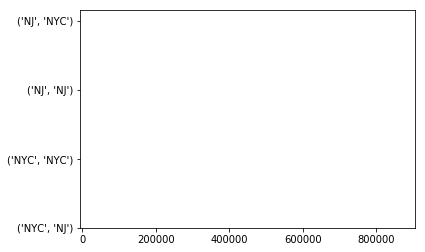

In [25]:
# Data visualization
plt.bar(count_trip,trip_category)

This graph show nothing.

<BarContainer object of 4 artists>

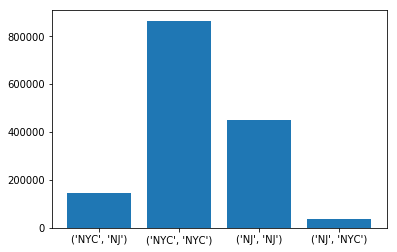

In [26]:
# Let's make some data visualizations about it.
plt.bar(trip_category,count_trip)

In [27]:
header.take(20)

[u'VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type']

In [28]:
taxi.take(10)

[u'2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979484558105469,40.684955596923828,-73.97943115234375,40.685020446777344,1,.00,7.8,0,0,1.95,0,,0,9.75,1,2',
 u'2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010795593261719,40.912216186523438,-74.010780334472656,40.912212371826172,1,.00,45,0,0,0,0,,0,45,1,2',
 u'2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921409606933594,40.766708374023438,-73.914413452148438,40.764686584472656,1,.59,4,0.5,0.5,0.5,0,,0.3,5.8,1,1',
 u'2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.92138671875,40.766677856445313,-73.931427001953125,40.771583557128906,1,.74,5,0.5,0.5,0,0,,0.3,6.3,2,1',
 u'2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482482910156,40.714046478271484,-73.944412231445313,40.714729309082031,1,.61,5,0.5,0.5,0,0,,0.3,6.3,2,1',
 u'2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297241210938,40.808185577392578,-73.937667846679688,40.821197509765625,1,1.07,5.5,0.5,0.5,1.36,0,,0.3,8.16,1,1',
 u'2,2015-09-01 00:00:52,2015-

In [29]:
header.take(20)

[u'VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type']

In [30]:
# Ehail_fee: There are a lot of missing values so exclude this column.
# From lpep_pickup_datetime and Lpep_dropoff_datetime, create derived variables such as year, month, and hour
def transform(s):
    t = s.split(",")
    taxi1 =str(t[1].split(" ")[0].split("-")[0] + "_pick_up_year")
    taxi2 =str(t[1].split(" ")[0].split("-")[1] + "_pick_up_month")
    taxi3 =str(t[1].split(" ")[1].split(":")[0]+"_pick_up_hour")
    taxi4 =str(t[2].split(" ")[0].split("-")[0] + "_drop_off_year")
    taxi5 =str(t[2].split(" ")[0].split("-")[1] + "_drop_off_month")
    taxi6 =str(t[2].split(" ")[1].split(":")[0]+"_drop_off_hour")  
    taxi7 = str(t[3] + "_Store_and_fwd_flag")
    taxi8 = str(t[4] + "_RateCodeID")
    taxi9 = str(t[9] + "_Passenger_count")
    taxi10 = str(str(round(float(t[10]))) + "_Trip_distance")
    taxi11 = str(str(round(float(t[11]))) + "_Fare_amount")
    taxi12 = str(str(float(t[12])) + "_Extra")
    taxi13 = str(str(float(t[12])) + "_MTA_tax")
    taxi14 = str(str(round(float(t[14]))) + "_Tip_amount")
    taxi15 = str(str(round(float(t[15]))) + "_Tolls_amount")
    taxi16 = str(str(float(t[17])) + "_Improvement_surcharge")
    taxi17 = str(str(round(float(t[18]))) + "_Total_amount")
    taxi18 = str(t[19] + "_Payment_type")
    taxi19 = str(t[20] + "_Trip_type")
    return [ taxi1, taxi2, taxi3, taxi4, taxi5, taxi6, taxi7, taxi8, taxi9, taxi10, taxi11, taxi12, taxi13, taxi14, taxi15, 
            taxi16, taxi17, taxi18, taxi19 ]
    
taxi_all = taxi.map(transform)
print taxi_all.take(10)

[['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '5_RateCodeID', '1_Passenger_count', '0.0_Trip_distance', '8.0_Fare_amount', '0.0_Extra', '0.0_MTA_tax', '2.0_Tip_amount', '0.0_Tolls_amount', '0.0_Improvement_surcharge', '10.0_Total_amount', '1_Payment_type', '2_Trip_type'], ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '5_RateCodeID', '1_Passenger_count', '0.0_Trip_distance', '45.0_Fare_amount', '0.0_Extra', '0.0_MTA_tax', '0.0_Tip_amount', '0.0_Tolls_amount', '0.0_Improvement_surcharge', '45.0_Total_amount', '1_Payment_type', '2_Trip_type'], ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '1.0_Trip_distance', '4.0_Fare_amount', '0.5_Extra', '0.5_MTA_t

In [31]:
#Frequent_Pattern for all variables (Except for Ehail_fee)
from pyspark.mllib.fpm import FPGrowth
all_model = FPGrowth.train(taxi_all, minSupport=0.40, numPartitions=10)
all_result = all_model.freqItemsets().sortBy(lambda x: x[1], False).collect()
for fi in all_result:
    print fi

FreqItemset(items=[u'2015_drop_off_year'], freq=1494926)
FreqItemset(items=[u'2015_drop_off_year', u'09_pick_up_month'], freq=1494926)
FreqItemset(items=[u'09_pick_up_month'], freq=1494926)
FreqItemset(items=[u'2015_pick_up_year'], freq=1494926)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year'], freq=1494926)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=1494926)
FreqItemset(items=[u'2015_pick_up_year', u'09_pick_up_month'], freq=1494926)
FreqItemset(items=[u'09_drop_off_month'], freq=1494314)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year'], freq=1494314)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year'], freq=1494314)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=1494314)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'09_pick_up_month'], freq=1494314)
FreqItemset(items=[u'09_drop_off_month', u

FreqItemset(items=[u'2_Payment_type', u'0.0_Tip_amount', u'0.3_Improvement_surcharge', u'09_drop_off_month', u'2015_drop_off_year'], freq=760862)
FreqItemset(items=[u'2_Payment_type', u'0.0_Tip_amount', u'0.3_Improvement_surcharge', u'09_drop_off_month', u'2015_drop_off_year', u'09_pick_up_month'], freq=760862)
FreqItemset(items=[u'2_Payment_type', u'0.0_Tip_amount', u'0.3_Improvement_surcharge', u'09_drop_off_month', u'09_pick_up_month'], freq=760862)
FreqItemset(items=[u'2_Payment_type', u'0.3_Improvement_surcharge', u'1_Trip_type', u'09_drop_off_month'], freq=760846)
FreqItemset(items=[u'2_Payment_type', u'0.3_Improvement_surcharge', u'1_Trip_type', u'09_drop_off_month', u'2015_pick_up_year'], freq=760846)
FreqItemset(items=[u'2_Payment_type', u'0.3_Improvement_surcharge', u'1_Trip_type', u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year'], freq=760846)
FreqItemset(items=[u'2_Payment_type', u'0.3_Improvement_surcharge', u'1_Trip_type', u'09_drop_off_month', u'2015_pic

FreqItemset(items=[u'0.0_Tip_amount', u'1_Passenger_count', u'0.3_Improvement_surcharge', u'0.0_Tolls_amount', u'09_drop_off_month', u'09_pick_up_month'], freq=717954)
FreqItemset(items=[u'0.0_Tip_amount', u'1_Passenger_count', u'0.3_Improvement_surcharge', u'1_Trip_type', u'0.0_Tolls_amount', u'09_drop_off_month'], freq=717858)
FreqItemset(items=[u'0.0_Tip_amount', u'1_Passenger_count', u'0.3_Improvement_surcharge', u'1_Trip_type', u'0.0_Tolls_amount', u'09_drop_off_month', u'2015_pick_up_year'], freq=717858)
FreqItemset(items=[u'0.0_Tip_amount', u'1_Passenger_count', u'0.3_Improvement_surcharge', u'1_Trip_type', u'0.0_Tolls_amount', u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year'], freq=717858)
FreqItemset(items=[u'0.0_Tip_amount', u'1_Passenger_count', u'0.3_Improvement_surcharge', u'1_Trip_type', u'0.0_Tolls_amount', u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=717858)
FreqItemset(items=[u'0.0_Tip_amount', u'1_Passe

FreqItemset(items=[u'0.0_MTA_tax', u'0.0_Extra', u'0.3_Improvement_surcharge', u'1_Trip_type', u'N_Store_and_fwd_flag', u'09_drop_off_month'], freq=644461)
FreqItemset(items=[u'0.0_MTA_tax', u'0.0_Extra', u'0.3_Improvement_surcharge', u'1_Trip_type', u'N_Store_and_fwd_flag', u'09_drop_off_month', u'2015_pick_up_year'], freq=644461)
FreqItemset(items=[u'0.0_MTA_tax', u'0.0_Extra', u'0.3_Improvement_surcharge', u'1_Trip_type', u'N_Store_and_fwd_flag', u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year'], freq=644461)
FreqItemset(items=[u'0.0_MTA_tax', u'0.0_Extra', u'0.3_Improvement_surcharge', u'1_Trip_type', u'N_Store_and_fwd_flag', u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=644461)
FreqItemset(items=[u'0.0_MTA_tax', u'0.0_Extra', u'0.3_Improvement_surcharge', u'1_Trip_type', u'N_Store_and_fwd_flag', u'09_drop_off_month', u'2015_pick_up_year', u'09_pick_up_month'], freq=644461)
FreqItemset(items=[u'0.0_MTA_tax', u'0.0_Ext

FreqItemset(items=[u'0.0_MTA_tax', u'1_RateCodeID', u'0.3_Improvement_surcharge', u'0.0_Tolls_amount', u'09_drop_off_month', u'2015_pick_up_year', u'09_pick_up_month'], freq=627465)
FreqItemset(items=[u'0.0_MTA_tax', u'1_RateCodeID', u'0.3_Improvement_surcharge', u'0.0_Tolls_amount', u'09_drop_off_month', u'2015_drop_off_year'], freq=627465)
FreqItemset(items=[u'0.0_MTA_tax', u'1_RateCodeID', u'0.3_Improvement_surcharge', u'0.0_Tolls_amount', u'09_drop_off_month', u'2015_drop_off_year', u'09_pick_up_month'], freq=627465)
FreqItemset(items=[u'0.0_MTA_tax', u'1_RateCodeID', u'0.3_Improvement_surcharge', u'0.0_Tolls_amount', u'09_drop_off_month', u'09_pick_up_month'], freq=627465)
FreqItemset(items=[u'0.0_MTA_tax', u'0.0_Extra', u'1_RateCodeID', u'0.3_Improvement_surcharge', u'0.0_Tolls_amount', u'09_drop_off_month'], freq=627465)
FreqItemset(items=[u'0.0_MTA_tax', u'0.0_Extra', u'1_RateCodeID', u'0.3_Improvement_surcharge', u'0.0_Tolls_amount', u'09_drop_off_month', u'2015_pick_up_year']

In [32]:
# Association Rule for all variables
all_rules = sorted(all_model._java_model.generateAssociationRules(0.25).collect(), key = lambda x: x.confidence(), reverse=True)
for rule in all_rules:
    print rule

{2_Payment_type,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag} => {2015_drop_off_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag} => {09_pick_up_month}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month} => {0.0_MTA_tax}: 1.0
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month} => {2015_pick_u

{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag} => {2015_drop_off_year}: 1.0
{2_Payment_type,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag} => {09_pick_up_month}: 1.0
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_Extra,1_Trip_type,0.0_Tolls_amount,N_Store_and_f

{2_Payment_type,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount} => {2015_drop_off_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,1_RateCodeID,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Extra}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_MT

{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag} => {2015_pick_up_year}: 1.0
{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag} => {2015_drop_off_year}: 1.0
{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {2015_

{2_Payment_type,0.0_Tip_amount,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_MTA_tax}: 1.0
{0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Extra,N_Store_and_fwd_flag} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.0_Extra,N_Store_and_fwd_flag} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,0.0_Extra,N_Store_and_fwd_flag} => {09_pick_up_month}: 1.0
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateC

{2_Payment_type,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month} => {2015_drop_off_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month} => {09_pick_up_month}: 1.0
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_pick_up_month} => {0.0_Extra}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_Passen

{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {0.0_MTA_tax}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{2_Payment_type,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_Tolls_amount} => {2015_pick_up_year}: 1.0
{0.0_Tolls_amount} => {2015_drop_off_year}: 1.0
{0.0_Tolls_amount} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_Paymen

{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {0.0_Extra}: 1.0
{0.0_MTA_tax,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_RateCodeID,N_Store_and_fwd_flag,09_drop_off_month}

{0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_Payment_type,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_Payment_type,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_

{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {2015_drop_off_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Extra}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {09_pick_up_month}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,09_pick_up_month} => {2015_drop_off_y

{1_Payment_type,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount} => {2015_drop_off_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount} => {09_pick_up_month}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,1_

{0.0_Extra,1_RateCodeID,0.0_Tolls_amount,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_Extra,1_RateCodeID,0.0_Tolls_amount,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_Extra,1_RateCodeID,0.0_Tolls_amount,09_pick_up_month} => {0.0_MTA_tax}: 1.0
{2_Payment_type,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_Payment_type,1_RateCodeID,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{1_Payment_type,1_RateCodeID,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} 

{2_Payment_type,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {0.0_Extra}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {2015_drop_off_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {09_pick_up_month}: 1.0
{09_drop_off_month,09_pick_up_month} => {2015_pick_up_year}: 1.0
{09_drop_off_month,09_pick_up_month} => {2015_drop_off_year}: 1.0
{2_Payment_type,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag} => {2015_drop_off_year}: 1.0
{2_Payment_typ

{2_Payment_type,0.0_Tip_amount,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month} => {2015_drop_off_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month} => {09_pick_up_month}: 1.0
{2_Payment_type,0.0_Tip_amount,0.3_Improvement_surcharge,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_pick_up_month} => {2015_pic

{1_Payment_type,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month} => {09_pick_up_month}: 1.0
{0.0_Tip_amount,1_RateCodeID,09_drop_off_month,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{0.0_Tip_amount,1_RateCodeID,09_drop_off_month,2015_pick_up_year} => {09_pick_up_month}: 1.0
{1_Payment_type,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{1_Payment_type,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {0.0_Extra}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_

{0.0_MTA_tax,1_Trip_type,N_Store_and_fwd_flag} => {09_pick_up_month}: 1.0
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Extra}: 1.0
{1_Payment_type,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{2_Payment_type,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{2_Payment_type,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type

{0.0_Extra,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{0.0_Extra,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {09_pick_up_month}: 1.0
{1_RateCodeID,1_Trip_type,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_Tip_amount,0.3_Improvement_surcharge,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag} => {2015_pick_up_year}: 1.0
{0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_fla

{0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year} => {0.0_Extra}: 1.0
{2_Payment_type,0.0_Tip_amount,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.0_Tip_amount,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{1_Passenger_

{0.0_Tip_amount,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag} => {09_pick_up_month}: 1.0
{2_Payment_type,0.0_Tip_amount,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_Payment_type,1_RateCodeID,0.3_Improvement_surc

{2_Payment_type,0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Extra}: 1.0
{0.0_MTA_tax,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2_Payment_type,1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_

{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag} => {2015_pick_up_year}: 1.0
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag} => {2015_drop_off_year}: 1.0
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag} => {09_pick_up_month}: 1.0
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag} => {0.0_MTA_tax}: 1.0
{0.0_MTA_tax,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_MTA_tax,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_MTA_tax,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {0.0_Extra}: 1.0
{0.0

{2_Payment_type,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,2015_drop_off_year} => {0.0_Tip_amount}: 0.9999984362245457
{2_Payment_type,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type} => {0.0_Tip_amount}: 0.9999984362245457
{2_Payment_type,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,2015_pick_up_year} => {0.0_Tip_amount}: 0.9999984362245457
{2_Payment_type,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,2015_pick_up_year,09_pick_up_month} => {0.0_Tip_amount}: 0.9999984362245457
{2_Payment_type,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,2015_pick_up_year,2015_drop_off_year} => {0.0_Tip_amount}: 0.9999984362245457
{2_Payment_type,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {0.0_Tip_amount}: 0.9999984362245457
{2_Payment_type,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,09_pick_up_month} => {0.0_Tip_amount}: 0.9999984362245457
{2_Payment_type,1_Passenger_count,0.3_Improveme

{2_Payment_type,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {0.0_Tip_amount}: 0.9999973752557485
{2_Payment_type,0.3_Improvement_surcharge,2015_pick_up_year} => {0.0_Tip_amount}: 0.9999973723521521
{2_Payment_type,0.3_Improvement_surcharge,2015_pick_up_year,09_pick_up_month} => {0.0_Tip_amount}: 0.9999973723521521
{2_Payment_type,0.3_Improvement_surcharge,2015_pick_up_year,2015_drop_off_year} => {0.0_Tip_amount}: 0.9999973723521521
{2_Payment_type,0.3_Improvement_surcharge,09_pick_up_month} => {0.0_Tip_amount}: 0.9999973723521521
{2_Payment_type,0.3_Improvement_surcharge,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Tip_amount}: 0.9999973723521521
{2_Payment_type,0.3_Improvement_surcharge,2015_drop_off_year} => {0.0_Tip_amount}: 0.9999973723521521
{2_Payment_type,0.3_Improvement_surcharge,2015_drop_off_year,09_pick_up_month} => {0.0_Tip_amount}: 0.9999973723521521
{2_Payment_type,0.3_Improvement_surcharge} => {0.0_Tip_amount}: 0.9999973723521521
{2_Payment_typ

{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 0.9999953004279744
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {1_Trip_type}: 0.9999953004279744
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {1_Trip_type}: 0.9999953004279744
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {1_Trip_type}: 0.9999953004279744
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9999953004279744
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {1_Trip_type}: 0.9999953004279744
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcha

{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.9999901502370275
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {1_Trip_type}: 0.9999901502370275
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9999901502370275
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9999901502370275
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.9999901463409141
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,0.3_Impro

{0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.9998766255465489
{0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag} => {1_Trip_type}: 0.9998766255465489
{0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year} => {1_Trip_type}: 0.9998766255465489
{0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 0.9998766255465489
{0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9998766255465489
{0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9998766255465489
{0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 0.9998765759488136
{0.3_Improvement_surcharge,0.0_Tolls_amount,N

{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {09_drop_off_month}: 0.9998315031364488
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9998315031364488
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {09_drop_off_month}: 0.9998315031364488
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {09_drop_off_month}: 0.9998315031364488
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {09_drop_off_month}: 0.9998315031364488
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year} => {09_drop_off_month}: 0.9998315031364488
{0.0_MT

{1_Payment_type,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year} => {1_Trip_type}: 0.9997721500616791
{1_Payment_type,0.3_Improvement_surcharge,09_drop_off_month,09_pick_up_month} => {1_Trip_type}: 0.9997721500616791
{1_Payment_type,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9997721500616791
{1_Payment_type,0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year} => {1_Trip_type}: 0.9997721500616791
{1_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.9997711870582234
{1_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_pick_up_month} => {1_Trip_type}: 0.9997711870582234
{1_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9997711870582234
{1_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_

{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_drop_off_month}: 0.9996541722445337
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag} => {09_drop_off_month}: 0.9996541722445337
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9996541722445337
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {09_drop_off_month}: 0.9996541722445337
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {09_drop_off_month}: 0.9996541722445337
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amou

{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year} => {09_drop_off_month}: 0.9996441343265343
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {09_drop_off_month}: 0.9996441343265343
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9996441343265343
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_drop_off_month}: 0.9996441343265343
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag} => {09_drop_off_month}: 0.9996441333707553
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {09_drop_off_month}: 0.9996441333707553
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {09_drop_off_month}: 0.9996441333707553
{2_Payment_type

{0.0_Extra,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {1_Trip_type}: 0.9996208545969381
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {1_Trip_type}: 0.9996208545969381
{0.0_MTA_tax,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {1_Trip_type}: 0.9996208545969381
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month} => {1_Trip_type}: 0.9996208545969381
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9996208545969381
{0.0_MTA_tax,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month} => {1_Trip_type}: 0.9996208545969381
{0.0_MTA_tax,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 0.99962

{0.0_Tip_amount,1_Passenger_count} => {09_drop_off_month}: 0.9996028641596194
{0.0_Tip_amount,1_Passenger_count,09_pick_up_month} => {09_drop_off_month}: 0.9996028641596194
{0.0_Tip_amount,1_Passenger_count,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9996028641596194
{0.0_Tip_amount,1_Passenger_count,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9996028641596194
{0.0_Tip_amount,1_Passenger_count,2015_drop_off_year} => {09_drop_off_month}: 0.9996028641596194
{1_Passenger_count,2015_drop_off_year} => {09_drop_off_month}: 0.9996026538581594
{1_Passenger_count,2015_pick_up_year,09_pick_up_month} => {09_drop_off_month}: 0.9996026538581594
{1_Passenger_count,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9996026538581594
{1_Passenger_count} => {09_drop_off_month}: 0.9996026538581594
{1_Passenger_count,2015_pick_up_year} => {09_drop_off_month}: 0.9996026538581594
{1_Passenger_count,2015_pick_up_year,2015_drop_off_year,09_pi

{0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {09_drop_off_month}: 0.9995945927054646
{0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag} => {09_drop_off_month}: 0.9995945927054646
{0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,2015_drop_off_year} => {09_drop_off_month}: 0.9995945927054646
{0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {09_drop_off_month}: 0.9995945927054646
{0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_pick_up_month} => {09_drop_off_month}: 0.9995945927054646
{0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9995945927054646
{0.0_Tip_amount,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {09_drop_off_month}: 0.9995944960816475
{0.0_Tip_amount,0.0_Tolls_a

{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year} => {1_Trip_type}: 0.9994809596242628
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount} => {1_Trip_type}: 0.9994809596242628
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,09_pick_up_month} => {1_Trip_type}: 0.9994809596242628
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,2015_drop_off_year} => {1_Trip_type}: 0.9994809596242628
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9994809596242628
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9994809596242628
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.9994809596242628
{2_Payment_type,1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 0.9994809596242628
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_mon

{1_Payment_type,1_RateCodeID,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9989068477039434
{1_Payment_type,1_RateCodeID,09_drop_off_month,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9989063430645986
{1_Payment_type,1_RateCodeID,09_drop_off_month,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9989063430645986
{1_Payment_type,1_RateCodeID,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9989063430645986
{1_Payment_type,1_RateCodeID,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9989063430645986
{1_Payment_type,1_RateCodeID,09_drop_off_month} => {0.3_Improvement_surcharge}: 0.9989063430645986
{1_Payment_type,1_RateCodeID,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9989063430645986
{1_Payment_type,1_RateCodeID,09_drop_off_month,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9989063430645986
{1_Payment_type,1_RateCodeID,09_drop_off_month,

{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9985462392724638
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9985462392724638
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9985462392724638
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9985462392724638
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9985462392724638
{2_Payment_type,1_Passenger_count,1_Trip_type,09_drop_off_month,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9985457328740911
{2_Payment_type,1_Passenger_count,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9985457328740911
{2_Payment_type,1_Pas

{1_RateCodeID,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.997546047774787
{1_RateCodeID,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.997546047774787
{1_Passenger_count,1_RateCodeID,1_Trip_type} => {0.3_Improvement_surcharge}: 0.9975440413999781
{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9975440413999781
{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9975440413999781
{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9975440413999781
{1_Passenger_count,1_RateCodeID,1_Trip_type,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9975440413999781
{1_Passenger_count,1_

{0.0_MTA_tax,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9970824633162667
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9970824633162667
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9970824633162667
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month} => {0.3_Improvement_surcharge}: 0.9970824633162667
{0.0_MTA_tax,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9970824633162667
{0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9970824633162667
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_

{0.0_MTA_tax,1_Trip_type,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9966193187052083
{0.0_MTA_tax,1_Trip_type,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9966193187052083
{0.0_Extra,1_Trip_type,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9966193187052083
{0.0_Extra,1_Trip_type,2015_pick_up_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9966193187052083
{0.0_MTA_tax,1_Trip_type,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9966193187052083
{0.0_MTA_tax,1_Trip_type,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9966193187052083
{0.0_MTA_tax,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9966193187052083
{0.0_Extra,1_Trip_type,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9966193187052083
{0.0_Extra,1_Trip_type,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9966193187052083
{0.0_Extra,1_Trip_type,2015_

{2_Payment_type,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9959397687550416
{2_Payment_type,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {1_RateCodeID}: 0.9959397687550416
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_RateCodeID}: 0.9959397623329521
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year} => {1_RateCodeID}: 0.9959397623329521
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9959397623329521
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {1_RateCodeID}: 0.9959397623329521
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_Trip_typ

{0.0_Tip_amount,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9956859756634544
{0.0_Tip_amount,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month} => {1_RateCodeID}: 0.9956859756634544
{0.0_Tip_amount,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9956859756634544
{0.0_Tip_amount,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year} => {1_RateCodeID}: 0.9956859756634544
{1_Payment_type,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {1_RateCodeID}: 0.9956845496094677
{1_Payment_type,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month} => {1_RateCodeID}: 0.9956845496094677
{1_Payment_type,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9956845496094677
{1_Payment_type,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pi

{2_Payment_type,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,09_pick_up_month} => {1_RateCodeID}: 0.99506612395073
{2_Payment_type,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {1_RateCodeID}: 0.99506612395073
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year} => {1_RateCodeID}: 0.9950661162325402
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month} => {1_RateCodeID}: 0.9950661162325402
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9950661162325402
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {1_RateCodeID}: 0.9950661162325402
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.3_Improveme

{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {1_RateCodeID}: 0.9945571260744236
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9945571260744236
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9945571260744236
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {1_RateCodeID}: 0.9945571260744236
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,2015_drop_off_year} => {1_RateCodeID}: 0.9945571260744236
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9945571260744236
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month} => {1_RateCodeID}: 0.9945563366115641
{0.0_Tip_amount,1_Passenger_count,1_Trip_

{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month} => {N_Store_and_fwd_flag}: 0.9942165109177343
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.9942165109177343
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9942165109177343
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9942165109177343
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9942165109177343
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_

{2_Payment_type,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9936246030419522
{2_Payment_type,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9936246030419522
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9936245859925416
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9936245859925416
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month} => {N_Store_and_fwd_flag}: 0.9936245859925416
{2_Payment_type,0.0_Tip_amount,1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {

{2_Payment_type,0.0_Tip_amount,1_RateCodeID,1_Trip_type,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935880440302592
{2_Payment_type,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935870791520693
{2_Payment_type,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.9935870791520693
{2_Payment_type,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935870791520693
{2_Payment_type,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935870791520693
{2_Payment_type,1_RateCodeID,1_Trip_type,09_drop_off_month,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935870791520693
{2_Payment_type,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year} => {N_Store_and_fwd_flag}: 0.9935870791520693
{2_Payment

{2_Payment_type,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935438523003497
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.9935438523003497
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935438523003497
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935438523003497
{2_Payment_type,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935438523003497
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9935438420565774
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick

{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9929783626549691
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9929783626549691
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9929783626549691
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9929783626549691
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9929783626549691
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.9929783626549691
{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_o

{0.0_MTA_tax,0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.9929365737695018
{0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9929365737695018
{0.0_MTA_tax,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9929365737695018
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9929365737695018
{0.0_MTA_tax,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.9929365737695018
{0.0_MTA_tax,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month} => {N_Store_and_fwd_flag}: 0.9929365737695018
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,1_Trip_type,0.0_Tolls_amoun

{2_Payment_type,1_Passenger_count,1_RateCodeID,1_Trip_type,09_drop_off_month,09_pick_up_month} => {0.0_Tolls_amount}: 0.9886449100715189
{2_Payment_type,1_Passenger_count,1_RateCodeID,1_Trip_type,09_drop_off_month} => {0.0_Tolls_amount}: 0.9886449100715189
{2_Payment_type,1_Passenger_count,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9886449100715189
{2_Payment_type,1_Passenger_count,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year} => {0.0_Tolls_amount}: 0.9886449100715189
{2_Payment_type,1_Passenger_count,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9886449100715189
{2_Payment_type,1_Passenger_count,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9886449100715189
{2_Payment_type,1_Passenger_count,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Tolls_amount}:

{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type,2015_pick_up_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9878234021827067
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9878234021827067
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type,2015_pick_up_year} => {0.0_Tolls_amount}: 0.9878234021827067
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9878234021827067
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type} => {0.0_Tolls_amount}: 0.9878234021827067
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {0.0_Tolls_amount}: 0.9878215189645451
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9878215189645451
{0.0_Tip_amount,1_Passenger_count,1_RateCodeID,

{2_Payment_type,0.0_Tip_amount,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9869725514750659
{2_Payment_type,0.0_Tip_amount,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9869725514750659
{2_Payment_type,0.0_Tip_amount,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9869725514750659
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9869709511734742
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month} => {0.0_Tolls_amount}: 0.9869709511734742
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9869709511734742
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick

{1_Payment_type,2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.9837912295536635
{1_Payment_type,09_pick_up_month} => {1_Trip_type}: 0.9837912295536635
{1_Payment_type,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 0.9837912295536635
{1_Payment_type,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9837912295536635
{1_Payment_type,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9837912295536635
{1_Payment_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9837651820701794
{1_Payment_type,N_Store_and_fwd_flag,09_drop_off_month} => {1_Trip_type}: 0.9837651820701794
{1_Payment_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9837651820701794
{1_Payment_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {1_Trip_type}: 0.9837651820701794
{1_Payment_type,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_mont

{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9812387966293071
{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9812387966293071
{1_Passenger_count,1_RateCodeID,1_Trip_type,09_pick_up_month} => {0.0_Tolls_amount}: 0.9812387966293071
{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_pick_up_year} => {0.0_Tolls_amount}: 0.9812387966293071
{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9812387966293071
{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_pick_up_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9812387966293071
{1_Passenger_count,1_RateCodeID,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9812319608762339
{1_Passenger_count,1_RateCodeID,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9812319608762339
{1_Passenger_count,1_RateCodeID} => {0.0_Tolls_amount}: 0.9

{09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9786852027084
{09_drop_off_month,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9786852027084
{09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9786852027084
{09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9786852027084
{09_drop_off_month,09_pick_up_month} => {0.0_Tolls_amount}: 0.9786852027084
{09_drop_off_month,2015_pick_up_year} => {0.0_Tolls_amount}: 0.9786852027084
{09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9786852027084
{09_drop_off_month} => {0.0_Tolls_amount}: 0.9786852027084
{N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9786831042018797
{N_Store_and_fwd_flag} => {0.0_Tolls_amount}: 0.9786831042018797
{N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9786831042018797
{N_Store_and_fwd_flag,2015_pick_up_year,09_p

{0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month} => {0.0_Tolls_amount}: 0.9760371459237482
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9760371459237482
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9760371459237482
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year} => {0.0_Tolls_amount}: 0.9760371459237482
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year} => {0.0_Tolls_amount}: 0.9760371459237482
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9760371459237482
{0.0_MTA_tax,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month} => {0.0_Tolls_amount}: 0.9760371459237482
{0.0_MTA_tax,0.0_Extra,1_RateCodeID,0.3_Improvement_surcharge,

{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9741467900666891
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9741467900666891
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9741467900666891
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month} => {0.3_Improvement_surcharge}: 0.9741467900666891
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9741467900666891
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9741467900666891
{2_Payment_type,1_Pas

{0.0_MTA_tax,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year} => {0.0_Tolls_amount}: 0.9723384755200591
{0.0_MTA_tax,0.3_Improvement_surcharge,09_drop_off_month} => {0.0_Tolls_amount}: 0.9723384755200591
{0.0_MTA_tax,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9723384755200591
{0.0_MTA_tax,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9723384755200591
{0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag} => {0.0_Tolls_amount}: 0.9723351738282553
{0.0_MTA_tax,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9723351738282553
{0.0_MTA_tax,0.0_Extra,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {0.0_Tolls_amount}: 0.9723351738282553
{0.0_MTA_tax,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag} => {0.0_Tolls_amount}: 0.97233

{2_Payment_type,0.0_Tip_amount,1_Passenger_count,09_drop_off_month,09_pick_up_month} => {1_RateCodeID}: 0.9710176505723027
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,09_drop_off_month,2015_drop_off_year} => {1_RateCodeID}: 0.9710176505723027
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,09_drop_off_month} => {1_RateCodeID}: 0.9710176505723027
{2_Payment_type,0.0_Tip_amount,1_Passenger_count,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9710176505723027
{0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.9707458777727773
{0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {1_Trip_type}: 0.9707458777727773
{0.0_Tip_amount,1_Passenger_count,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 0.9707458777727773
{0.0_Tip_amo

{0.0_Tip_amount,1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9659634396867176
{0.0_Tip_amount,1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9659634396867176
{0.0_Tip_amount,1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {1_RateCodeID}: 0.9659634396867176
{0.0_Tip_amount,1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {1_RateCodeID}: 0.9659634396867176
{0.0_Tip_amount,1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9659634396867176
{0.0_Tip_amount,1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {1_RateCodeID}: 0.9659634396867176
{0.0_Tip_amount,1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_RateCodeID}: 0.9659634396867176


{0.0_MTA_tax,0.0_Tolls_amount} => {0.3_Improvement_surcharge}: 0.9481938042823652
{0.0_MTA_tax,0.0_Tolls_amount,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9481938042823652
{0.0_Extra,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9481938042823652
{0.0_MTA_tax,0.0_Extra,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9481938042823652
{0.0_MTA_tax,0.0_Extra,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9481938042823652
{0.0_Extra,0.0_Tolls_amount,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9481938042823652
{0.0_MTA_tax,0.0_Tolls_amount,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9481938042823652
{0.0_MTA_tax,0.0_Extra,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9481938042823652
{0.0_Extra,0.0_Tolls_amount,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9481938042823652
{0.

{0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag} => {2_Payment_type}: 0.8797397620195261
{0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {2_Payment_type}: 0.8797397620195261
{0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year} => {2_Payment_type}: 0.8797397620195261
{0.0_Tip_amount,1_RateCodeID,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {2_Payment_type}: 0.8797397620195261
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,2015_drop_off_year} => {2_Payment_type}: 0.8797227895330852
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,0.0_Tolls_amount} => {2_Payment_type}: 0.8797227895330852
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_pick_up_month} => {2_Payment_type}: 0.8797227895330852
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {2_Payment_type}: 0.8797227895330852
{0.0_Tip_amount,1_RateCodeID

{0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,09_pick_up_month} => {2_Payment_type}: 0.8770572736097628
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag} => {2_Payment_type}: 0.8770281738897389
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year} => {2_Payment_type}: 0.8770281738897389
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {2_Payment_type}: 0.8770281738897389
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {2_Payment_type}: 0.8770281738897389
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {2_Payment_type}: 0.8770281738897389
{0.0_Tip_amount,1_Passenger_count,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {2_Payment_type}: 0.8770281738897389
{0.0

{0.0_Tip_amount,1_RateCodeID,1_Trip_type,09_drop_off_month} => {1_Passenger_count}: 0.8427135590959443
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8427135590959443
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {1_Passenger_count}: 0.8427135590959443
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_Passenger_count}: 0.8427135590959443
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year} => {1_Passenger_count}: 0.8427135590959443
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,09_drop_off_month,09_pick_up_month} => {1_Passenger_count}: 0.8427135590959443
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8427135590959443
{0.0_Tip_amount,1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => 

{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_pick_up_month} => {1_Passenger_count}: 0.8417515865267269
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {1_Passenger_count}: 0.8417515865267269
{0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8416992868397503
{0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year} => {1_Passenger_count}: 0.8416992868397503
{0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year} => {1_Passenger_count}: 0.8416992868397503
{0.3_Improvement_surcharge,09_drop_off_month,09_pick_up_month} => {1_Passenger_count}: 0.8416992868397503
{0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8416992868397503
{0.3_Improvement_surcharge,09_drop_off_month} => {1_Passenger_count}: 0.8416992868397503
{0.3_Improvement_surcharge,09_drop_off_month,2015_pic

{2_Payment_type,0.0_Tip_amount,1_Trip_type,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8406754157544726
{2_Payment_type,1_Trip_type,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8406745100749825
{2_Payment_type,1_Trip_type,0.0_Tolls_amount,2015_drop_off_year} => {1_Passenger_count}: 0.8406745100749825
{2_Payment_type,1_Trip_type,0.0_Tolls_amount,2015_pick_up_year} => {1_Passenger_count}: 0.8406745100749825
{2_Payment_type,1_Trip_type,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8406745100749825
{2_Payment_type,1_Trip_type,0.0_Tolls_amount} => {1_Passenger_count}: 0.8406745100749825
{2_Payment_type,1_Trip_type,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {1_Passenger_count}: 0.8406745100749825
{2_Payment_type,1_Trip_type,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {1_Passenger_count}: 0.8406745100749825
{2_Payment_type,1_Trip_type,0.0_Tolls_

{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {1_Passenger_count}: 0.8401580417008927
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {1_Passenger_count}: 0.8401580417008927
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_Passenger_count}: 0.8401580417008927
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {1_Passenger_count}: 0.8401580417008927
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8401580417008927
{2_Payment_type,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_Passenger_count}: 0.8401580417008927
{2_Payment_type,0.0_Tip_amount,0.3_Improvement_surcharge,1_Trip_type,N

{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Tip_amount}: 0.5976855502167663
{1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month} => {0.0_Tip_amount}: 0.5976376567919126
{1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {0.0_Tip_amount}: 0.5976376567919126
{1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {0.0_Tip_amount}: 0.5976376567919126
{1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {0.0_Tip_amount}: 0.5976376567919126
{1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.0_Tip_amount}: 0.5976376567919126
{1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Tip_amount}: 0.5976376567919126
{1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd

{1_RateCodeID,2015_drop_off_year} => {0.0_Tip_amount}: 0.5932645978174778
{1_RateCodeID,2015_drop_off_year,09_pick_up_month} => {0.0_Tip_amount}: 0.5932645978174778
{1_RateCodeID} => {0.0_Tip_amount}: 0.5932645978174778
{1_RateCodeID,1_Trip_type,09_drop_off_month} => {0.0_Tip_amount}: 0.593175674234496
{1_RateCodeID,1_Trip_type,09_drop_off_month,09_pick_up_month} => {0.0_Tip_amount}: 0.593175674234496
{1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year} => {0.0_Tip_amount}: 0.593175674234496
{1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Tip_amount}: 0.593175674234496
{1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Tip_amount}: 0.593175674234496
{1_RateCodeID,1_Trip_type,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.0_Tip_amount}: 0.593175674234496
{1_RateCodeID,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Tip_amount}: 0.59317567423

{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {2_Payment_type}: 0.5257456907743694
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2_Payment_type}: 0.5257456907743694
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,09_pick_up_month} => {2_Payment_type}: 0.5257238876744434
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {2_Payment_type}: 0.5257238876744434
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {2_Payment_type}: 0.5257238876744434
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_drop_off_year} => {2_Payment_type}: 0.5257238876744434
{1_RateCodeID,0.3_Improveme

{1_Trip_type,09_drop_off_month,09_pick_up_month} => {2_Payment_type}: 0.5215776172692127
{1_Trip_type,09_drop_off_month} => {2_Payment_type}: 0.5215776172692127
{1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {2_Payment_type}: 0.5215776172692127
{1_Trip_type,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2_Payment_type}: 0.5215776172692127
{1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {2_Payment_type}: 0.5215776172692127
{1_Trip_type,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2_Payment_type}: 0.5215776172692127
{1_Trip_type,09_drop_off_month,2015_pick_up_year} => {2_Payment_type}: 0.5215776172692127
{1_Trip_type,09_drop_off_month,2015_drop_off_year} => {2_Payment_type}: 0.5215776172692127
{1_Trip_type,2015_pick_up_year,2015_drop_off_year} => {2_Payment_type}: 0.5215524260591472
{1_Trip_type,2015_drop_off_year,09_pick_up_month} => {2_Payment_type}: 0.5215524260591472
{1_Trip_type,2015_drop_off_

{1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {1_Payment_type}: 0.4725644243923497
{1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_Payment_type}: 0.4725644243923497
{1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {1_Payment_type}: 0.4725644243923497
{1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Payment_type}: 0.4725644243923497
{1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {1_Payment_type}: 0.4725644243923497
{1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month} => {1_Payment_type}: 0.4725644243923497
{1_RateCodeID,1_Trip_type,2015_drop_off_year} => {1_Payment_type}: 0.47244630080627026
{1_RateCodeID,1_Trip_type,09_pick_up_month} => {1_Payment_type}: 0.47244630080627026
{1_RateCodeID,1_Trip_type,2015_pick_up_year,09_pick_up_month} => {1_Payment_type}: 0.47244630080627026
{1_

{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {0.0_Extra}: 0.44545885692597326
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month} => {0.0_MTA_tax}: 0.44545885692597326
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month} => {0.0_Extra}: 0.44545885692597326
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_MTA_tax}: 0.44545885692597326
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Extra}: 0.44545885692597326
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year} => {0.0_MTA_tax}: 0.44545885692597326
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year} => {0.0_Extra}: 0.44545885692597326
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.0_MTA_tax}: 0.44545885692597326
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year

{0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Extra}: 0.4420085758562631
{0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {0.0_MTA_tax}: 0.4420085758562631
{0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {0.0_Extra}: 0.4420085758562631
{0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month} => {0.0_MTA_tax}: 0.4420085758562631
{0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month} => {0.0_Extra}: 0.4420085758562631
{0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {0.0_MTA_tax}: 0.44197100206846085
{0.3_Improvement_surcharge,0.0_Tolls_amount,N_Store_and_fwd_flag,2015_pick_up_year} => {0.0_Extra}: 0.44197100206846085
{0.3_Improvement_surchar

In [33]:
def transform_NJ(s):
    t = s.split(",")
    x = float(t[5])
    y = float(t[6])
    a = float(t[7])
    b = float(t[8])      
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"       
    if pick_up == "NJ" and drop_off == "NJ":
        taxi1 =str(t[1].split(" ")[0].split("-")[0] + "_pick_up_year")
        taxi2 =str(t[1].split(" ")[0].split("-")[1] + "_pick_up_month")
        taxi3 =str(t[1].split(" ")[1].split(":")[0]+"_pick_up_hour")
        taxi4 =str(t[2].split(" ")[0].split("-")[0] + "_drop_off_year")
        taxi5 =str(t[2].split(" ")[0].split("-")[1] + "_drop_off_month")
        taxi6 =str(t[2].split(" ")[1].split(":")[0]+"_drop_off_hour")
        taxi7 = str(t[3] + "_Store_and_fwd_flag")
        taxi8 = str(t[4] + "_RateCodeID")
        taxi9 = str(t[9] + "_Passenger_count")
        taxi10 = str(str(round(float(t[10]))) + "_Trip_distance")
        taxi11 = str(str(round(float(t[11]))) + "_Fare_amount")
        taxi12 = str(str(float(t[12])) + "_Extra")
        taxi13 = str(str(float(t[12])) + "_MTA_tax")
        taxi14 = str(str(round(float(t[14]))) + "_Tip_amount")
        taxi15 = str(str(round(float(t[15]))) + "_Tolls_amount")
        taxi16 = str(str(float(t[17])) + "_Improvement_surcharge")
        taxi17 = str(str(round(float(t[18]))) + "_Total_amount")
        taxi18 = str(t[19] + "_Payment_type")
        taxi19 = str(t[20] + "_Trip_type")
        return [ taxi1, taxi2, taxi3, taxi4, taxi5, taxi6, taxi7, taxi8, taxi9, taxi10, taxi11, taxi12, taxi13, taxi14, taxi15, 
            taxi16, taxi17, taxi18, taxi19 ] 
taxi_NJ = taxi.map(transform_NJ)
print taxi_NJ.take(10)

[None, ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '5_RateCodeID', '1_Passenger_count', '0.0_Trip_distance', '45.0_Fare_amount', '0.0_Extra', '0.0_MTA_tax', '0.0_Tip_amount', '0.0_Tolls_amount', '0.0_Improvement_surcharge', '45.0_Total_amount', '1_Payment_type', '2_Trip_type'], None, None, None, ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '1.0_Trip_distance', '6.0_Fare_amount', '0.5_Extra', '0.5_MTA_tax', '1.0_Tip_amount', '0.0_Tolls_amount', '0.3_Improvement_surcharge', '8.0_Total_amount', '1_Payment_type', '1_Trip_type'], None, ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '1.0_Trip_distance', '5.0_Fare_amo

In [34]:
# There are missing values so it is needed to handle them
taxi_NJ_filter = taxi_NJ.filter(lambda x: x is not None)
print taxi_NJ_filter.take(10)

[['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '5_RateCodeID', '1_Passenger_count', '0.0_Trip_distance', '45.0_Fare_amount', '0.0_Extra', '0.0_MTA_tax', '0.0_Tip_amount', '0.0_Tolls_amount', '0.0_Improvement_surcharge', '45.0_Total_amount', '1_Payment_type', '2_Trip_type'], ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '1.0_Trip_distance', '6.0_Fare_amount', '0.5_Extra', '0.5_MTA_tax', '1.0_Tip_amount', '0.0_Tolls_amount', '0.3_Improvement_surcharge', '8.0_Total_amount', '1_Payment_type', '1_Trip_type'], ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '1.0_Trip_distance', '5.0_Fare_amount', '0.5_Extra', '0.5_MTA_ta

In [35]:
# Frequent Pattern for NJ
from pyspark.mllib.fpm import FPGrowth
model_NJ = FPGrowth.train(taxi_NJ_filter, minSupport=0.80, numPartitions=10)
result_NJ = model_NJ.freqItemsets().sortBy(lambda x: x[1], False).collect()
for fi in result_NJ:
    print fi

FreqItemset(items=[u'2015_drop_off_year'], freq=449130)
FreqItemset(items=[u'2015_drop_off_year', u'09_pick_up_month'], freq=449130)
FreqItemset(items=[u'09_pick_up_month'], freq=449130)
FreqItemset(items=[u'2015_pick_up_year'], freq=449130)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year'], freq=449130)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=449130)
FreqItemset(items=[u'2015_pick_up_year', u'09_pick_up_month'], freq=449130)
FreqItemset(items=[u'09_drop_off_month'], freq=449000)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year'], freq=449000)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year'], freq=449000)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=449000)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'09_pick_up_month'], freq=449000)
FreqItemset(items=[u'09_drop_off_month', u'2015_drop_o

In [36]:
# Association rule for NJ
rules_NJ = sorted(model_NJ._java_model.generateAssociationRules(0.8).collect(),
key = lambda x: x.confidence(), reverse=True)
for rule in rules_NJ:
    print rule

{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{1_Passenger_count,1_RateCodeID,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {2015_pick_up_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {09_pick_up_month}: 1.0
{0.3_Improvement_surcharge,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.3

{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_Tolls_amount,09_drop_off_month} => {2015_pick_up_year}: 1.0
{0.0_Tolls_amount,09_drop_off_month} => {2015_drop_off_year}: 1.0
{0.0_Tolls_amount,09_drop_off_month} => {09_pick_up_month}: 1.0
{1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_Passen

{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {09_pick_up_month}: 1.0
{0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year}

{1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,0.0_Tolls_amount,2015_pick_up_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month} => {2015_pick_up_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month} => {2015_drop_off_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,0.0

{1_RateCodeID,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9997121827917805
{1_RateCodeID,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_drop_off_year} => {09_drop_off_month}: 0.9997121827917805
{1_RateCodeID,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {09_drop_off_month}: 0.9997121827917805
{1_RateCodeID,N_Store_and_fwd_flag,0.0_Tolls_amount,09_pick_up_month} => {09_drop_off_month}: 0.9997121827917805
{1_RateCodeID,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year} => {09_drop_off_month}: 0.9997121827917805
{1_RateCodeID,N_Store_and_fwd_flag,0.0_Tolls_amount} => {09_drop_off_month}: 0.9997121827917805
{1_Passenger_count,1_RateCodeID,1_Trip_type} => {09_drop_off_month}: 0.999712148887063
{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_pick_up_year,2015_drop_off_year} => {09_drop_off_month}: 0.999712148887063
{1_Passenger_count,1_RateCodeID,1_Trip_type,2015_drop_off_year,09_pi

{1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9976874333923068
{1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,09_pick_up_month} => {1_RateCodeID}: 0.9976874333923068
{1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount} => {1_RateCodeID}: 0.9976874333923068
{1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {1_RateCodeID}: 0.9976874333923068
{1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,2015_pick_up_year} => {1_RateCodeID}: 0.9976874333923068
{1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,2015_drop_off_year} => {1_RateCodeID}: 0.9976874333923068
{1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9976874333923068
{0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} 

{1_Passenger_count,1_Trip_type,N_Store_and_fwd_flag,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9974122840398812
{1_Passenger_count,1_Trip_type,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9974118813431083
{1_Passenger_count,1_Trip_type,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9974118813431083
{1_Passenger_count,1_Trip_type} => {0.3_Improvement_surcharge}: 0.9974118813431083
{1_Passenger_count,1_Trip_type,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9974118813431083
{1_Passenger_count,1_Trip_type,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9974118813431083
{1_Passenger_count,1_Trip_type,2015_pick_up_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9974118813431083
{1_Passenger_count,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9974118813431083
{1_Passenger_count,1_Trip_type,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9974118813431083

{1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {1_RateCodeID}: 0.9968601703028863
{1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {1_RateCodeID}: 0.9968601703028863
{1_Trip_type,N_Store_and_fwd_flag,2015_drop_off_year} => {1_RateCodeID}: 0.9968601703028863
{1_Trip_type,N_Store_and_fwd_flag} => {1_RateCodeID}: 0.9968601703028863
{1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9968601703028863
{1_Trip_type,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9968601703028863
{1_Trip_type,N_Store_and_fwd_flag,09_pick_up_month} => {1_RateCodeID}: 0.9968601703028863
{1_Trip_type,09_drop_off_month} => {1_RateCodeID}: 0.9968554036138775
{1_Trip_type,09_drop_off_month,09_pick_up_month} => {1_RateCodeID}: 0.9968554036138775
{1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9968554036138775
{1_Trip_type,09_drop_off_month,2015_pick_up_ye

{1_Passenger_count,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9940793669750647
{1_Passenger_count,09_drop_off_month} => {N_Store_and_fwd_flag}: 0.9940793669750647
{1_Passenger_count,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9940793669750647
{1_Passenger_count,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.9940793669750647
{1_Passenger_count,09_drop_off_month,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9940793669750647
{1_Passenger_count,0.0_Tolls_amount,2015_pick_up_year} => {N_Store_and_fwd_flag}: 0.9940719474353842
{1_Passenger_count,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.9940719474353842
{1_Passenger_count,0.0_Tolls_amount,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.9940719474353842
{1_Passenger_count,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9940719474353842
{1_Passenger_c

{1_Passenger_count,09_drop_off_month} => {1_RateCodeID}: 0.9709101258070991
{1_Passenger_count,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9709101258070991
{1_Passenger_count,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_RateCodeID}: 0.9709101258070991
{1_Passenger_count,09_drop_off_month,09_pick_up_month} => {1_RateCodeID}: 0.9709101258070991
{1_Passenger_count,2015_drop_off_year} => {1_RateCodeID}: 0.9709083888602399
{1_Passenger_count,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9709083888602399
{1_Passenger_count,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9709083888602399
{1_Passenger_count} => {1_RateCodeID}: 0.9709083888602399
{1_Passenger_count,2015_pick_up_year} => {1_RateCodeID}: 0.9709083888602399
{1_Passenger_count,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9709083888602399
{1_Passenger_count,09_pick_up_month} => {1_RateCodeID}: 0.9709083888602399
{1_Passenger_count,201

{1_Trip_type,2015_pick_up_year,09_pick_up_month} => {1_Passenger_count}: 0.8788797373151851
{1_Trip_type,09_drop_off_month} => {1_Passenger_count}: 0.8788791383209552
{1_Trip_type,09_drop_off_month,09_pick_up_month} => {1_Passenger_count}: 0.8788791383209552
{1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8788791383209552
{1_Trip_type,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_Passenger_count}: 0.8788791383209552
{1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_Passenger_count}: 0.8788791383209552
{1_Trip_type,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8788791383209552
{1_Trip_type,09_drop_off_month,2015_pick_up_year} => {1_Passenger_count}: 0.8788791383209552
{1_Trip_type,09_drop_off_month,2015_drop_off_year} => {1_Passenger_count}: 0.8788791383209552
{0.3_Improvement_surcharge} => {1_Passenger_count}: 0.8788004155519394
{0.3_Improvement_surc

In [37]:
def transform_NY(s):
    t = s.split(",")
    x = float(t[5])
    y = float(t[6])
    a = float(t[7])
    b = float(t[8]) 
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"        
    if pick_up == "NYC" and drop_off == "NYC":
        taxi1 =str(t[1].split(" ")[0].split("-")[0] + "_pick_up_year")
        taxi2 =str(t[1].split(" ")[0].split("-")[1] + "_pick_up_month")
        taxi3 =str(t[1].split(" ")[1].split(":")[0]+"_pick_up_hour")
        taxi4 =str(t[2].split(" ")[0].split("-")[0] + "_drop_off_year")
        taxi5 =str(t[2].split(" ")[0].split("-")[1] + "_drop_off_month")
        taxi6 =str(t[2].split(" ")[1].split(":")[0]+"_drop_off_hour")
        taxi7 = str(t[3] + "_Store_and_fwd_flag")
        taxi8 = str(t[4] + "_RateCodeID")
        taxi9 = str(t[9] + "_Passenger_count")
        taxi10 = str(str(round(float(t[10]))) + "_Trip_distance")
        taxi11 = str(str(round(float(t[11]))) + "_Fare_amount")
        taxi12 = str(str(float(t[12])) + "_Extra")
        taxi13 = str(str(float(t[12])) + "_MTA_tax")
        taxi14 = str(str(round(float(t[14]))) + "_Tip_amount")
        taxi15 = str(str(round(float(t[15]))) + "_Tolls_amount")
        taxi16 = str(str(float(t[17])) + "_Improvement_surcharge")
        taxi17 = str(str(round(float(t[18]))) + "_Total_amount")
        taxi18 = str(t[19] + "_Payment_type")
        taxi19 = str(t[20] + "_Trip_type")
        return [ taxi1, taxi2, taxi3, taxi4, taxi5, taxi6, taxi7, taxi8, taxi9, taxi10, taxi11, taxi12, taxi13, taxi14, taxi15, 
            taxi16, taxi17, taxi18, taxi19 ] 

taxi_NY = taxi.map(transform_NY)
print taxi_NY.take(10)

[['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '5_RateCodeID', '1_Passenger_count', '0.0_Trip_distance', '8.0_Fare_amount', '0.0_Extra', '0.0_MTA_tax', '2.0_Tip_amount', '0.0_Tolls_amount', '0.0_Improvement_surcharge', '10.0_Total_amount', '1_Payment_type', '2_Trip_type'], None, ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '1.0_Trip_distance', '4.0_Fare_amount', '0.5_Extra', '0.5_MTA_tax', '1.0_Tip_amount', '0.0_Tolls_amount', '0.3_Improvement_surcharge', '6.0_Total_amount', '1_Payment_type', '1_Trip_type'], ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '1.0_Trip_distance', '5.0_Fare_amount', '0.5_Extra', '0.5_M

In [38]:
# There are missing values so it is needed to handle them
taxi_NY_filter = taxi_NY.filter(lambda x: x is not None)
print taxi_NY_filter.take(10)

[['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '5_RateCodeID', '1_Passenger_count', '0.0_Trip_distance', '8.0_Fare_amount', '0.0_Extra', '0.0_MTA_tax', '2.0_Tip_amount', '0.0_Tolls_amount', '0.0_Improvement_surcharge', '10.0_Total_amount', '1_Payment_type', '2_Trip_type'], ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '1.0_Trip_distance', '4.0_Fare_amount', '0.5_Extra', '0.5_MTA_tax', '1.0_Tip_amount', '0.0_Tolls_amount', '0.3_Improvement_surcharge', '6.0_Total_amount', '1_Payment_type', '1_Trip_type'], ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '1.0_Trip_distance', '5.0_Fare_amount', '0.5_Extra', '0.5_MTA_tax

In [39]:
# Frequent Pattern for NY
from pyspark.mllib.fpm import FPGrowth
model_NY = FPGrowth.train(taxi_NY_filter, minSupport=0.80, numPartitions=10)
result_NY = model_NY.freqItemsets().sortBy(lambda x: x[1], False).collect()
for fi in result_NY:
    print fi

FreqItemset(items=[u'2015_drop_off_year'], freq=864553)
FreqItemset(items=[u'2015_drop_off_year', u'09_pick_up_month'], freq=864553)
FreqItemset(items=[u'09_pick_up_month'], freq=864553)
FreqItemset(items=[u'2015_pick_up_year'], freq=864553)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year'], freq=864553)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=864553)
FreqItemset(items=[u'2015_pick_up_year', u'09_pick_up_month'], freq=864553)
FreqItemset(items=[u'09_drop_off_month'], freq=864185)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year'], freq=864185)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year'], freq=864185)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=864185)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'09_pick_up_month'], freq=864185)
FreqItemset(items=[u'09_drop_off_month', u'2015_drop_o

In [40]:
# Association rule for NY
rules_NY = sorted(model_NY._java_model.generateAssociationRules(0.8).collect(),
key = lambda x: x.confidence(), reverse=True)
for rule in rules_NY:
    print rule

{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{1_Passenger_count,1_RateCodeID,09_drop_off_month,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {2015_pick_up_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount} => {09_pick_up_month}: 1.0
{0.3_Improvement_surcharge,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_Passenger_count,1_RateCodeID,0.3

{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,2015_pick_up_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount} => {2015_pick_up_year}: 1.0
{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount} => {2015_drop_off_year}: 1.0
{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,0.0_Toll

{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_pick_up_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,1_Trip_type,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_RateCodeID,1_Trip_type,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount} => {2015_pick_up_year}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount} => {2015_drop_off_year}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0

{1_RateCodeID,0.3_Improvement_surcharge,0.0_Tolls_amount,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_Trip_type,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_Trip_type,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month} => {2015_pick_up_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month} => {09_pick_up_month}: 1.0
{1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year} => {09_pick_up

{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {09_drop_off_month}: 0.9995895580088938
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9995895580088938
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9995895580088938
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year} => {09_drop_off_month}: 0.9995895580088938
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {09_drop_off_month}: 0.9995895580088938
{1_Passenger_count,1_RateCodeID,0.3_Improvement_surcharge,1_

{1_Passenger_count,1_RateCodeID,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 0.999508275691523
{1_Passenger_count,1_RateCodeID,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.999508275691523
{1_Passenger_count,1_RateCodeID,09_drop_off_month,2015_pick_up_year} => {1_Trip_type}: 0.999508275691523
{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_drop_off_year} => {1_Trip_type}: 0.9995071407120452
{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag} => {1_Trip_type}: 0.9995071407120452
{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,09_pick_up_month} => {1_Trip_type}: 0.9995071407120452
{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_pick_up_year} => {1_Trip_type}: 0.9995071407120452
{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.9995071407120452
{1_Passenger_count,1_RateCodeID,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {1_Trip_ty

{0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9973457896718292
{0.3_Improvement_surcharge,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9973457896718292
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9973455359208359
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,09_pick_up_month} => {0.0_Tolls_amount}: 0.9973455359208359
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.0_Tolls_amount}: 0.9973455359208359
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9973455359208359
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month} => {0.0_Tolls_amount}: 0.9973455359208359
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.0_Tolls_amount}: 0.9973455

{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,09_pick_up_month} => {1_RateCodeID}: 0.9966396358765321
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9966396358765321
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year} => {1_RateCodeID}: 0.9966396358765321
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9966396358765321
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount} => {1_RateCodeID}: 0.9966396358765321
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_drop_off_year} => {1_RateCodeID}: 0.9966396358765321
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_

{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.994545896616355
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.994545896616355
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month} => {N_Store_and_fwd_flag}: 0.994545896616355
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {N_Store_and_fwd_flag}: 0.994545896616355
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_pick_up_year} => {N_Store_and_fwd_flag}: 0.994545896616355
{0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.994545896616355
{1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {N_Store_and_fwd_flag}: 0.9945397732852345
{1_RateCodeID,0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {N_Store_and_fwd

{2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 0.9834689139937054
{2015_pick_up_year,2015_drop_off_year} => {1_Trip_type}: 0.9834689139937054
{1_Passenger_count,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9821709320672747
{1_Passenger_count,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9821709320672747
{1_Passenger_count,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9821709320672747
{1_Passenger_count,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9821709320672747
{1_Passenger_count,N_Store_and_fwd_flag,0.0_Tolls_amount,09_drop_off_month} => {0.3_Improvement_surcharge}: 0.9821709320672747
{1_Passenger_count,N_Store_and_fwd_flag,0.0_Tolls_amou

{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_drop_off_year} => {1_Passenger_count}: 0.8258364742642583
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8258364742642583
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8258364742642583
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,2015_pick_up_year} => {1_Passenger_count}: 0.8258364742642583
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,0.0_Tolls_amount,09_pick_up_month} => {1_Passenger_count}: 0.8258364742642583
{1_RateCodeID,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_Passenger_count}: 0.8258210416975812
{1_RateCodeID,N_Store_and_fwd_flag,

In [41]:
def transform_NY_NJ(s):
    t = s.split(",")
    x = float(t[5])
    y = float(t[6]) 
    a = float(t[7])    
    b = float(t[8])
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"
        
    if pick_up == "NYC" and drop_off == "NJ":
        taxi1 =str(t[1].split(" ")[0].split("-")[0] + "_pick_up_year")
        taxi2 =str(t[1].split(" ")[0].split("-")[1] + "_pick_up_month")
        taxi3 =str(t[1].split(" ")[1].split(":")[0]+"_pick_up_hour")
        taxi4 =str(t[2].split(" ")[0].split("-")[0] + "_drop_off_year")
        taxi5 =str(t[2].split(" ")[0].split("-")[1] + "_drop_off_month")
        taxi6 =str(t[2].split(" ")[1].split(":")[0]+"_drop_off_hour")
        taxi7 = str(t[3] + "_Store_and_fwd_flag")
        taxi8 = str(t[4] + "_RateCodeID")
        taxi9 = str(t[9] + "_Passenger_count")
        taxi10 = str(str(round(float(t[10]))) + "_Trip_distance")
        taxi11 = str(str(round(float(t[11]))) + "_Fare_amount")
        taxi12 = str(str(float(t[12])) + "_Extra")
        taxi13 = str(str(float(t[12])) + "_MTA_tax")
        taxi14 = str(str(round(float(t[14]))) + "_Tip_amount")
        taxi15 = str(str(round(float(t[15]))) + "_Tolls_amount")
        taxi16 = str(str(float(t[17])) + "_Improvement_surcharge")
        taxi17 = str(str(round(float(t[18]))) + "_Total_amount")
        taxi18 = str(t[19] + "_Payment_type")
        taxi19 = str(t[20] + "_Trip_type")
        return [ taxi1, taxi2, taxi3, taxi4, taxi5, taxi6, taxi7, taxi8, taxi9, taxi10, taxi11, taxi12, taxi13, taxi14, taxi15, 
            taxi16, taxi17, taxi18, taxi19 ]
taxi_NY_NJ = taxi.map(transform_NY_NJ)
print taxi_NY_NJ.take(100)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '6_Passenger_count', '2.0_Trip_distance', '8.0_Fare_amount', '0.5_Extra', '0.5_MTA_tax', '2.0_Tip_amount', '0.0_Tolls_amount', '0.3_Improvement_surcharge', '11.0_Total_amount', '1_Payment_type', '1_Trip_type'], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N

In [42]:
# There are missing values so it is needed to handle them
taxi_NY_NJ_filter = taxi_NY_NJ.filter(lambda x: x is not None)

In [43]:
taxi_NY_NJ_filter.take(100)

[['2015_pick_up_year',
  '09_pick_up_month',
  '00_pick_up_hour',
  '2015_drop_off_year',
  '09_drop_off_month',
  '00_drop_off_hour',
  'N_Store_and_fwd_flag',
  '1_RateCodeID',
  '6_Passenger_count',
  '2.0_Trip_distance',
  '8.0_Fare_amount',
  '0.5_Extra',
  '0.5_MTA_tax',
  '2.0_Tip_amount',
  '0.0_Tolls_amount',
  '0.3_Improvement_surcharge',
  '11.0_Total_amount',
  '1_Payment_type',
  '1_Trip_type'],
 ['2015_pick_up_year',
  '09_pick_up_month',
  '00_pick_up_hour',
  '2015_drop_off_year',
  '09_drop_off_month',
  '00_drop_off_hour',
  'N_Store_and_fwd_flag',
  '5_RateCodeID',
  '1_Passenger_count',
  '5.0_Trip_distance',
  '18.0_Fare_amount',
  '0.0_Extra',
  '0.0_MTA_tax',
  '1.0_Tip_amount',
  '0.0_Tolls_amount',
  '0.0_Improvement_surcharge',
  '19.0_Total_amount',
  '1_Payment_type',
  '2_Trip_type'],
 ['2015_pick_up_year',
  '09_pick_up_month',
  '00_pick_up_hour',
  '2015_drop_off_year',
  '09_drop_off_month',
  '00_drop_off_hour',
  'N_Store_and_fwd_flag',
  '1_RateCodeI

In [44]:
# Frequent Pattern for NY -> NJ
from pyspark.mllib.fpm import FPGrowth
model_NY_NJ = FPGrowth.train(taxi_NY_NJ_filter, minSupport=0.80, numPartitions=10)
result_NY_NJ = model_NY_NJ.freqItemsets().sortBy(lambda x: x[1], False).collect()
for fi in result_NY_NJ:
    print fi

FreqItemset(items=[u'2015_drop_off_year'], freq=144110)
FreqItemset(items=[u'2015_drop_off_year', u'09_pick_up_month'], freq=144110)
FreqItemset(items=[u'09_pick_up_month'], freq=144110)
FreqItemset(items=[u'2015_pick_up_year'], freq=144110)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year'], freq=144110)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=144110)
FreqItemset(items=[u'2015_pick_up_year', u'09_pick_up_month'], freq=144110)
FreqItemset(items=[u'09_drop_off_month'], freq=144028)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year'], freq=144028)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year'], freq=144028)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=144028)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'09_pick_up_month'], freq=144028)
FreqItemset(items=[u'09_drop_off_month', u'2015_drop_o

In [45]:
# Association rule NY -> NJ
rules_NY_NJ = sorted(model_NY_NJ._java_model.generateAssociationRules(0.8).collect(),
key = lambda x: x.confidence(), reverse=True)
for rule in rules_NY_NJ:
    print rule

{0.0_Tolls_amount,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {2015_drop_off_year}: 1.0
{0.0_Tolls_amount,1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year} => {09_pick_up_month}: 1.0
{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_Tolls_amount,1_RateCodeID,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 1.0
{0.0_Tolls_amount,1_RateCodeID,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_Tolls_amount,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{0.0_Tolls_amount,0.3_Improvement_surcharge,1_Trip_type,09_drop_off_month,

{09_pick_up_month} => {2015_drop_off_year}: 1.0
{09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.0_Tolls_amount,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.0_Tolls_amount,1_Trip_type,09_drop_off_month} => {2015_pick_up_year}: 1.0
{0.0_Tolls_amount,1_Trip_type,09_drop_off_month} => {2015_drop_off_year}: 1.0
{0.0_Tolls_amount,1_Trip_type,09_drop_off_month} => {09_pick_up_month}: 1.0
{0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {2015_pick_up_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,09_pick_up_month} => {2015_drop_off_year}: 1.0
{0.0_Tolls_amount,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{0.0_Tolls_amount,1_Trip_type,N_Store_

{1_Passenger_count,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9994458558543198
{1_Passenger_count,09_pick_up_month} => {09_drop_off_month}: 0.9994458558543198
{1_Passenger_count,2015_pick_up_year,2015_drop_off_year} => {09_drop_off_month}: 0.9994458558543198
{1_Passenger_count,N_Store_and_fwd_flag,2015_pick_up_year} => {09_drop_off_month}: 0.9994427870932345
{1_Passenger_count,N_Store_and_fwd_flag,09_pick_up_month} => {09_drop_off_month}: 0.9994427870932345
{1_Passenger_count,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {09_drop_off_month}: 0.9994427870932345
{1_Passenger_count,N_Store_and_fwd_flag,2015_drop_off_year} => {09_drop_off_month}: 0.9994427870932345
{1_Passenger_count,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_drop_off_month}: 0.9994427870932345
{1_Passenger_count,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {09_drop_off_month}: 0.9994427870932345
{1_Passenger_count,N_Store_and_fwd_fl

{0.0_Tolls_amount,1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {1_RateCodeID}: 0.9989177662695804
{0.0_Tolls_amount,1_Trip_type,09_drop_off_month,2015_drop_off_year} => {1_RateCodeID}: 0.9989177662695804
{0.0_Tolls_amount,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {1_RateCodeID}: 0.998912351656851
{0.0_Tolls_amount,1_Trip_type,N_Store_and_fwd_flag} => {1_RateCodeID}: 0.998912351656851
{0.0_Tolls_amount,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.998912351656851
{0.0_Tolls_amount,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.998912351656851
{0.0_Tolls_amount,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year} => {1_RateCodeID}: 0.998912351656851
{0.0_Tolls_amount,1_Trip_type,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.998912351656851
{0.0_Tolls_amount,1_Trip_type,N_Store_and_fwd_flag,09_pi

{0.0_Tolls_amount,N_Store_and_fwd_flag,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 0.9716602044413113
{0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9712497372538945
{0.0_Tolls_amount} => {0.3_Improvement_surcharge}: 0.9712497372538945
{0.0_Tolls_amount,2015_pick_up_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9712497372538945
{0.0_Tolls_amount,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9712497372538945
{0.0_Tolls_amount,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9712497372538945
{0.0_Tolls_amount,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9712497372538945
{0.0_Tolls_amount,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9712497372538945
{0.0_Tolls_amount,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9712497372538945
{0.0_Tolls_amount,09_drop_off_month,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.971240

In [46]:
def transform_NJ_NY(d):
    t = d.split(",")    
    x = float(t[5])
    y = float(t[6])
    a = float(t[7])
    b = float(t[8])        
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"        
    if pick_up == "NJ" and drop_off == "NYC":
        taxi1 =str(t[1].split(" ")[0].split("-")[0] + "_pick_up_year")
        taxi2 =str(t[1].split(" ")[0].split("-")[1] + "_pick_up_month")
        taxi3 =str(t[1].split(" ")[1].split(":")[0]+"_pick_up_hour")
        taxi4 =str(t[2].split(" ")[0].split("-")[0] + "_drop_off_year")
        taxi5 =str(t[2].split(" ")[0].split("-")[1] + "_drop_off_month")
        taxi6 =str(t[2].split(" ")[1].split(":")[0]+"_drop_off_hour")
        taxi7 = str(t[3] + "_Store_and_fwd_flag")
        taxi8 = str(t[4] + "_RateCodeID")
        taxi9 = str(t[9] + "_Passenger_count")
        taxi10 = str(str(round(float(t[10]))) + "_Trip_distance")
        taxi11 = str(str(round(float(t[11]))) + "_Fare_amount")
        taxi12 = str(str(float(t[12])) + "_Extra")
        taxi13 = str(str(float(t[12])) + "_MTA_tax")
        taxi14 = str(str(round(float(t[14]))) + "_Tip_amount")
        taxi15 = str(str(round(float(t[15]))) + "_Tolls_amount")
        taxi16 = str(str(float(t[17])) + "_Improvement_surcharge")
        taxi17 = str(str(round(float(t[18]))) + "_Total_amount")
        taxi18 = str(t[19] + "_Payment_type")
        taxi19 = str(t[20] + "_Trip_type")
        return [ taxi1, taxi2, taxi3, taxi4, taxi5, taxi6, taxi7, taxi8, taxi9, taxi10, taxi11, taxi12, taxi13, taxi14, taxi15, taxi16, taxi17, taxi18, taxi19 ]
       
taxi_NJ_NY = taxi.map(transform_NJ_NY)
print taxi_NJ_NY.take(100)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, ['2015_pick_up_year', '09_pick_up_month', '00_pick_up_hour', '2015_drop_off_year', '09_drop_off_month', '00_drop_off_hour', 'N_Store_and_fwd_flag', '1_RateCodeID', '1_Passenger_count', '4.0_Trip_distance', '14.0_Fare_amount', '0.5_Extra', '0.5_MTA_tax', '4.0_Tip_amount', '6.0_Tolls_amount', '0.3_Improvement_surcharge', '24.0_Total_amount', '1_Payment_type', '1_Trip_type'], None, None, None, None, None, None, None, None, None, None]


In [47]:
taxi_NJ_NY_filter = taxi_NJ_NY.filter(lambda x: x is not None)

In [48]:
taxi_NJ_NY_filter.take(3)

[['2015_pick_up_year',
  '09_pick_up_month',
  '00_pick_up_hour',
  '2015_drop_off_year',
  '09_drop_off_month',
  '00_drop_off_hour',
  'N_Store_and_fwd_flag',
  '1_RateCodeID',
  '1_Passenger_count',
  '4.0_Trip_distance',
  '14.0_Fare_amount',
  '0.5_Extra',
  '0.5_MTA_tax',
  '4.0_Tip_amount',
  '6.0_Tolls_amount',
  '0.3_Improvement_surcharge',
  '24.0_Total_amount',
  '1_Payment_type',
  '1_Trip_type'],
 ['2015_pick_up_year',
  '09_pick_up_month',
  '00_pick_up_hour',
  '2015_drop_off_year',
  '09_drop_off_month',
  '00_drop_off_hour',
  'N_Store_and_fwd_flag',
  '5_RateCodeID',
  '1_Passenger_count',
  '4.0_Trip_distance',
  '10.0_Fare_amount',
  '0.0_Extra',
  '0.0_MTA_tax',
  '0.0_Tip_amount',
  '0.0_Tolls_amount',
  '0.0_Improvement_surcharge',
  '10.0_Total_amount',
  '2_Payment_type',
  '2_Trip_type'],
 ['2015_pick_up_year',
  '09_pick_up_month',
  '00_pick_up_hour',
  '2015_drop_off_year',
  '09_drop_off_month',
  '00_drop_off_hour',
  'N_Store_and_fwd_flag',
  '1_RateCode

In [49]:
# Frequent Pattern for NJ -> NY
from pyspark.mllib.fpm import FPGrowth
model_NJ_NY = FPGrowth.train(taxi_NJ_NY_filter, minSupport=0.8, numPartitions=10)
result_NJ_NY = model_NJ_NY.freqItemsets().sortBy(lambda x: x[1], False).collect()
for fi in result_NJ_NY:
    print fi

FreqItemset(items=[u'09_pick_up_month'], freq=37133)
FreqItemset(items=[u'2015_pick_up_year'], freq=37133)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year'], freq=37133)
FreqItemset(items=[u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=37133)
FreqItemset(items=[u'2015_pick_up_year', u'09_pick_up_month'], freq=37133)
FreqItemset(items=[u'2015_drop_off_year'], freq=37133)
FreqItemset(items=[u'2015_drop_off_year', u'09_pick_up_month'], freq=37133)
FreqItemset(items=[u'09_drop_off_month'], freq=37101)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year'], freq=37101)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year'], freq=37101)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'2015_drop_off_year', u'09_pick_up_month'], freq=37101)
FreqItemset(items=[u'09_drop_off_month', u'2015_pick_up_year', u'09_pick_up_month'], freq=37101)
FreqItemset(items=[u'09_drop_off_month', u'2015_drop_off_year'], f

In [50]:
# Association rule for NJ -> NY
rules_NJ_NY = sorted(model_NJ_NY._java_model.generateAssociationRules(0.8).collect(),
key = lambda x: x.confidence(), reverse=True)
for rule in rules_NJ_NY:
    print rule

{1_Passenger_count,0.3_Improvement_surcharge,09_drop_off_month} => {2015_pick_up_year}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,09_drop_off_month} => {2015_drop_off_year}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,09_drop_off_month} => {09_pick_up_month}: 1.0
{1_RateCodeID,1_Trip_type,N_Store_and_fwd_flag,2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{1_Passenger_count,2015_drop_off_year} => {2015_pick_up_year}: 1.0
{1_Passenger_count,2015_drop_off_year} => {09_pick_up_month}: 1.0
{0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,2015_pick_up_year,09_pick_up_month} => {2015_drop_off_year}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,2015_pick_up_year,09_pick_up_month} => {1_Trip_type}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,1_Trip_type,N_Stor

{0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month} => {2015_drop_off_year}: 1.0
{0.3_Improvement_surcharge,1_Trip_type,N_Store_and_fwd_flag,09_drop_off_month} => {09_pick_up_month}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month} => {2015_pick_up_year}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month} => {2015_drop_off_year}: 1.0
{1_Passenger_count,0.3_Improvement_surcharge,N_Store_and_fwd_flag,09_drop_off_month} => {09_pick_up_month}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {1_Trip_type}: 1.0
{1_RateCodeID,0.3_Improvement_surcharge,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{0.3_Improvement_surcharge,N_Store_and_fwd_flag,2015_drop_off_year,09_pick_up_month} => {2015_pick_up_year}: 1.0
{2015_pick_up_year,2015_drop_off_year} => {09_pick_up_month}: 1.0
{N_Store_and_fwd_flag,

{1_RateCodeID,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9986458205096639
{1_RateCodeID} => {0.3_Improvement_surcharge}: 0.9986458205096639
{1_RateCodeID,09_drop_off_month,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9986446942861543
{1_RateCodeID,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9986446942861543
{1_RateCodeID,09_drop_off_month} => {0.3_Improvement_surcharge}: 0.9986446942861543
{1_RateCodeID,09_drop_off_month,2015_pick_up_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9986446942861543
{1_RateCodeID,09_drop_off_month,2015_pick_up_year} => {0.3_Improvement_surcharge}: 0.9986446942861543
{1_RateCodeID,09_drop_off_month,2015_pick_up_year,2015_drop_off_year} => {0.3_Improvement_surcharge}: 0.9986446942861543
{1_RateCodeID,09_drop_off_month,2015_drop_off_year,09_pick_up_month} => {0.3_Improvement_surcharge}: 0.9986446942861543
{1_RateCodeID,09_drop_off_month,2015_drop_off_y

{0.3_Improvement_surcharge,2015_pick_up_year} => {1_RateCodeID}: 0.9325745818244525
{0.3_Improvement_surcharge} => {1_RateCodeID}: 0.9325745818244525
{0.3_Improvement_surcharge,2015_drop_off_year} => {1_RateCodeID}: 0.9325745818244525
{0.3_Improvement_surcharge,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9325745818244525
{0.3_Improvement_surcharge,2015_pick_up_year,09_pick_up_month} => {1_RateCodeID}: 0.9325745818244525
{0.3_Improvement_surcharge,2015_drop_off_year,09_pick_up_month} => {1_RateCodeID}: 0.9325745818244525
{0.3_Improvement_surcharge,09_pick_up_month} => {1_RateCodeID}: 0.9325745818244525
{0.3_Improvement_surcharge,2015_pick_up_year,2015_drop_off_year} => {1_RateCodeID}: 0.9325745818244525
{1_Trip_type,09_drop_off_month} => {1_RateCodeID}: 0.931788820945655
{1_Trip_type,09_drop_off_month,09_pick_up_month} => {1_RateCodeID}: 0.931788820945655
{1_Trip_type,09_drop_off_month,2015_pick_up_year,2015_drop_off_year,09_pick_up_month} => {1_RateCodeI

In [55]:
# Here is for checking trip counts

In [51]:
#nj - nj, nj - ny, ny - nj, ny - ny
#ny = 0, nj = 1
def pickuplocCal(word):
    long1 = float(word[5])
    lat1 = float(word[6])
    value = (1.323942*long1) + 138.669195
    if lat1 > value:
        word[4] = 0
    else:
        word[4] = 1

def dropofflocCal(word):
    long = float(word[7])
    lat = float(word[8])
    value = (1.323942*long) + 138.669195
    if lat > value:
        word[7] = 0
    else:
        word[7] = 1

def finalMapper(line):
    word = line.split(',')
    pickuplocCal(word)
    dropofflocCal(word)
    if word[4] == 1 and word[7] == 1:
        return (1,1)
    if word[4] == 1 and word[7] == 0:
        return (2,1)
    if word[4] == 0 and word[7] == 1:
        return (3,1)
    if word[4] == 0 and word[7] == 0:
        return (4,1)

def finalMapper2(line):
    word = line.split(',')
    pickuplocCal(word)
    dropofflocCal(word)
    if word[4] == 1 and word[7] == 1:
        return [(1,1)]
    if word[4] == 1 and word[7] == 0:
        return [(1,0)]
    if word[4] == 0 and word[7] == 1:
        return [(0,1)]
    if word[4] == 0 and word[7] == 0:
        return [(0,0)]
# 1 - NJ , 0 - NY    

In [52]:
tripCounts = taxi.map(finalMapper).reduceByKey(lambda a,b: a+b)

In [53]:
print tripCounts.take(15) #1 - NJ - NJ , 2 - NJ - NY , 3 - NY - NJ , 4 - NY - NY ; NUMBER OF TRIPS OF EACH CATEGORY

[(1, 864553), (2, 144110), (3, 37133), (4, 449130)]


In [54]:
tripCounts2 = taxi.map(finalMapper2)

In [55]:
print tripCounts2.take(10)

[[(1, 1)], [(0, 0)], [(1, 1)], [(1, 1)], [(1, 1)], [(0, 0)], [(1, 1)], [(0, 0)], [(1, 1)], [(1, 1)]]


## clustering

In lab5, we learn about clustering so, we tried to make clusters on Green taxi area.

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters)

We can do the different marketing or taxi strategy for the different clusters.

In [3]:
#'VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type'

In [4]:
# # Let's do clustering by using Pickup_longitude,Pickup_latitude
# def pick_up_practice(s):
#     t = s.split(",")
#     pick_up = t[5:7] # Pickup_longitude,Pickup_latitude
#     return pick_up
# taxi_pick_up_ = taxi.map(pick_up)
# print taxi_pick_up_.take(10)

In [ ]:
#### Input data
#taxi1 = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09.csv")

In [56]:
import numpy as np
def pick_up_practice(s):
    t = s.split(",")
    pick_up_latitude = t[6] # Pickup_latitude
    pick_up_longitude = t[5] # Pickup_longitude
    return np.array([pick_up_latitude,pick_up_longitude], np.double)

taxi_pick_up_ = taxi.map(pick_up_practice)
print taxi_pick_up_.take(10)

[array([ 40.6849556 , -73.97948456]), array([ 40.91221619, -74.01079559]), array([ 40.76670837, -73.92140961]), array([ 40.76667786, -73.92138672]), array([ 40.71404648, -73.95548248]), array([ 40.80818558, -73.94529724]), array([ 40.74642563, -73.89087677]), array([ 40.79732132, -73.94670105]), array([ 40.69382858, -73.96315002]), array([ 40.74612808, -73.89682007])]


In [57]:
import numpy as np
def pick_up(s):
    t = s.split(",")
    pick_up_latitude = t[6] # Pickup_latitude
    pick_up_longitude = t[5] # Pickup_longitude
    return np.array([pick_up_latitude,pick_up_longitude], np.double)

taxi_pick_up = taxi.map(pick_up)
print taxi_pick_up.take(10)

[array([ 40.6849556 , -73.97948456]), array([ 40.91221619, -74.01079559]), array([ 40.76670837, -73.92140961]), array([ 40.76667786, -73.92138672]), array([ 40.71404648, -73.95548248]), array([ 40.80818558, -73.94529724]), array([ 40.74642563, -73.89087677]), array([ 40.79732132, -73.94670105]), array([ 40.69382858, -73.96315002]), array([ 40.74612808, -73.89682007])]


In [59]:
import numpy as np
def pick_up(s):
    t = s.split(",")
    pick_up_latitude = t[6] # Pickup_latitude
    pick_up_longitude = t[5] # Pickup_longitude
    return np.array([pick_up_latitude,pick_up_longitude], np.double)

taxi_pick_up = taxi.map(pick_up)
print taxi_pick_up.take(10)

[array([ 40.6849556 , -73.97948456]), array([ 40.91221619, -74.01079559]), array([ 40.76670837, -73.92140961]), array([ 40.76667786, -73.92138672]), array([ 40.71404648, -73.95548248]), array([ 40.80818558, -73.94529724]), array([ 40.74642563, -73.89087677]), array([ 40.79732132, -73.94670105]), array([ 40.69382858, -73.96315002]), array([ 40.74612808, -73.89682007])]


In [65]:
#taxi_pick_up = taxi.map(pick_up)

In [66]:
#print taxi_pick_up.take(10)

In [55]:
# # Let's do clustering by using Pickup_longitude,Pickup_latitude
# def pick_up(s):
#     t = s.split(",")
#     pick_up = t[5:7] # Pickup_longitude,Pickup_latitude
#     pick_up_transform = np.array([float(v) for v in pick_up])
#     return pick_up_transform

In [56]:
# taxi_pick_up = taxi.map(pick_up)

In [57]:
# print taxi_pick_up.take(10)

[array([-73.97948456,  40.6849556 ]), array([-74.01079559,  40.91221619]), array([-73.92140961,  40.76670837]), array([-73.92138672,  40.76667786]), array([-73.95548248,  40.71404648]), array([-73.94529724,  40.80818558]), array([-73.89087677,  40.74642563]), array([-73.94670105,  40.79732132]), array([-73.96315002,  40.69382858]), array([-73.89682007,  40.74612808])]


In [60]:
from random import random
from pyspark import SparkContext
from pyspark.mllib.clustering import KMeans, KMeansModel
from math import sqrt

In [61]:
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))
ks=[]
Errors=[]

for k in range(1,20):
    clusters = KMeans.train(taxi_pick_up, k, maxIterations=20, initializationMode="random")
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    WSSSE = taxi_pick_up.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("k = %d Within Set Sum of Squared Error = %f" % (k, WSSSE))
    ks.append(k)
    Errors.append(WSSSE)

k = 1 Within Set Sum of Squared Error = 376333.817417
k = 2 Within Set Sum of Squared Error = 96777.240588
k = 3 Within Set Sum of Squared Error = 62682.759168
k = 4 Within Set Sum of Squared Error = 43239.929831
k = 5 Within Set Sum of Squared Error = 40418.483419
k = 6 Within Set Sum of Squared Error = 34368.942123
k = 7 Within Set Sum of Squared Error = 32194.929533
k = 8 Within Set Sum of Squared Error = 27194.980423
k = 9 Within Set Sum of Squared Error = 27083.747438
k = 10 Within Set Sum of Squared Error = 24568.554638
k = 11 Within Set Sum of Squared Error = 22748.786608
k = 12 Within Set Sum of Squared Error = 24223.716937
k = 13 Within Set Sum of Squared Error = 24168.348101
k = 14 Within Set Sum of Squared Error = 20038.408082
k = 15 Within Set Sum of Squared Error = 19107.581837
k = 16 Within Set Sum of Squared Error = 18434.073959
k = 17 Within Set Sum of Squared Error = 17265.886371
k = 18 Within Set Sum of Squared Error = 17912.802337
k = 19 Within Set Sum of Squared Err

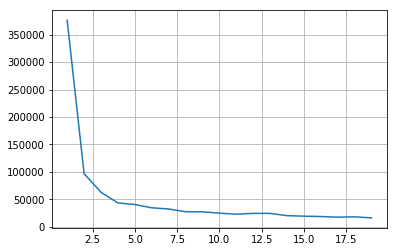

In [62]:
import matplotlib
import matplotlib.pyplot
import matplotlib.pyplot as plt
plt.plot(ks, Errors)
plt.grid(True)
# 7 is the best

In [63]:
clusters_pick_up = KMeans.train(taxi_pick_up, 7, maxIterations=20, initializationMode="random")
print clusters_pick_up.centers

[array([ 40.72965769, -73.8445035 ]), array([ 40.833934  , -73.93344423]), array([ 40.85468886, -73.87763562]), array([ 40.75370131, -73.91141094]), array([ 40.69099782, -73.96764889]), array([0., 0.]), array([ 40.80273797, -73.94892872])]


In [70]:
import numpy as np
def drop_off(s):
    t = s.split(",")
    drop_off_latitude = t[8] # Dropoff_latitude
    drop_off_longitude = t[7] # Dropoff_longitude
    return np.array([drop_off_latitude,drop_off_longitude], np.double)

taxi_drop_off = taxi.map(drop_off)
print taxi_drop_off.take(10)

[array([ 40.68502045, -73.97943115]), array([ 40.91221237, -74.01078033]), array([ 40.76468658, -73.91441345]), array([ 40.77158356, -73.931427  ]), array([ 40.71472931, -73.94441223]), array([ 40.82119751, -73.93766785]), array([ 40.75630569, -73.87692261]), array([ 40.80451584, -73.93764496]), array([ 40.68053055, -73.95678711]), array([ 40.75272369, -73.8886261 ])]


In [15]:
# # Let's do clustering by using Dropoff_longitude,Dropoff_latitude
# def drop_off(s):
#     t = s.split(",")
#     drop_off = t[7:9] # Dropoff_longitude,Dropoff_latitude
#     drop_off_transform = np.array([float(v) for v in drop_off])
#     return drop_off_transform

# taxi_drop_off = taxi.map(drop_off)
# print taxi_drop_off.take(5)

[array([-73.97943115,  40.68502045]), array([-74.01078033,  40.91221237]), array([-73.91441345,  40.76468658]), array([-73.931427  ,  40.77158356]), array([-73.94441223,  40.71472931])]


In [71]:
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))
ks=[]
Errors=[]

for k in range(1,20):
    clusters = KMeans.train(taxi_drop_off, k, maxIterations=20, initializationMode="random")
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    WSSSE = taxi_drop_off.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("k = %d Within Set Sum of Squared Error = %f" % (k, WSSSE))
    ks.append(k)
    Errors.append(WSSSE)

k = 1 Within Set Sum of Squared Error = 357496.287297
k = 2 Within Set Sum of Squared Error = 103098.971759
k = 3 Within Set Sum of Squared Error = 74887.922840
k = 4 Within Set Sum of Squared Error = 57062.576580
k = 5 Within Set Sum of Squared Error = 51427.009742
k = 6 Within Set Sum of Squared Error = 47597.792670
k = 7 Within Set Sum of Squared Error = 42230.131427
k = 8 Within Set Sum of Squared Error = 39752.880665
k = 9 Within Set Sum of Squared Error = 36431.571852
k = 10 Within Set Sum of Squared Error = 33992.756194
k = 11 Within Set Sum of Squared Error = 33308.927499
k = 12 Within Set Sum of Squared Error = 30118.677379
k = 13 Within Set Sum of Squared Error = 28883.436087
k = 14 Within Set Sum of Squared Error = 28796.320126
k = 15 Within Set Sum of Squared Error = 27046.078577
k = 16 Within Set Sum of Squared Error = 25840.987316
k = 17 Within Set Sum of Squared Error = 25814.164202
k = 18 Within Set Sum of Squared Error = 24506.284160
k = 19 Within Set Sum of Squared Er

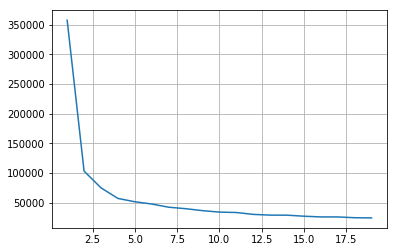

In [72]:
import matplotlib
import matplotlib.pyplot
import matplotlib.pyplot as plt
plt.plot(ks, Errors)
plt.grid(True)
# 16 is the best

In [73]:
clusters_drop_off = KMeans.train(taxi_drop_off, 10, maxIterations=20, initializationMode="random")
print clusters_drop_off.centers

[array([ 40.65445994, -73.9423157 ]), array([ 40.69649888, -73.80215093]), array([ 40.74071951, -73.99090274]), array([ 40.81490956, -73.9437624 ]), array([ 40.68044104, -73.98739303]), array([ 40.77201285, -73.94791455]), array([0., 0.]), array([ 40.70734304, -73.9446249 ]), array([ 40.85491327, -73.88912469]), array([ 40.74970864, -73.87810156])]


Let's make maps through using clusters

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
import os
import folium
from folium.plugins import MarkerCluster

In [75]:
#create map of New york using latitude and longitude values
map_nyc = folium.Map(location=[40.765937,-73.977304], zoom_start=12)

In [76]:
marker_pos1=[ 40.72965769, -73.8445035 ]
marker_pos2=[ 40.833934  , -73.93344423]
marker_pos3=[ 40.85468886, -73.87763562]
marker_pos4=[ 40.75370131, -73.91141094]
marker_pos5=[ 40.69099782, -73.96764889]
marker_pos6=[0., 0.]
marker_pos7=[ 40.80273797, -73.94892872]

In [77]:
folium.Marker(location=marker_pos1,popup='picked here').add_to(map_nyc)
folium.Marker(location=marker_pos2,popup='picked here').add_to(map_nyc)
folium.Marker(location=marker_pos3,popup='picked here').add_to(map_nyc)
folium.Marker(location=marker_pos4,popup='picked here').add_to(map_nyc)
folium.Marker(location=marker_pos5,popup='picked here').add_to(map_nyc)
folium.Marker(location=marker_pos6,popup='picked here').add_to(map_nyc)
folium.Marker(location=marker_pos7,popup='picked here').add_to(map_nyc)
map_nyc

In [78]:
marker_pos1_=[ 40.65445994, -73.9423157 ]
marker_pos2_=[ 40.69649888, -73.80215093]
marker_pos3_=[ 40.74071951, -73.99090274]
marker_pos4_=[ 40.81490956, -73.9437624 ]
marker_pos5_=[ 40.68044104, -73.98739303]
marker_pos6_=[ 40.77201285, -73.94791455]
marker_pos7_=[0., 0.]
marker_pos8_=[ 40.70734304, -73.9446249 ]
marker_pos9_=[ 40.85491327, -73.88912469]
marker_pos10_=[ 40.74970864, -73.87810156]

In [80]:
folium.CircleMarker(location=marker_pos1_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
folium.CircleMarker(location=marker_pos2_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
folium.CircleMarker(location=marker_pos3_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
folium.CircleMarker(location=marker_pos4_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
folium.CircleMarker(location=marker_pos5_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
folium.CircleMarker(location=marker_pos6_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
folium.CircleMarker(location=marker_pos7_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
folium.CircleMarker(location=marker_pos8_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
folium.CircleMarker(location=marker_pos9_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
folium.CircleMarker(location=marker_pos10_,popup='dropped here',radius=50,fill=True).add_to(map_nyc)
map_nyc

In [82]:
# # add markers to map
# for lat, lng, borough, loc in zip(london_data['Latitude'], london_data['Longitude'], london_data['Borough'], london_data['Location']):
#     label = '{} - {}'.format(loc, borough)
#     label = folium.Popup(label, parse_html=True)
#     folium.CircleMarker(
#         [lat, lng],
#         radius=5,
#         popup=label,
#         color='blue',
#         fill=True,
#         fill_color='#3186cc',
#         fill_opacity=0.7,
#         parse_html=False).add_to(map_london)  
    
# map_london

In [83]:
# NY_COORDINATES = (40, -73)
# gdata = pd.read_csv('green_tripdata.csv')
# MAX_RECORDS = 1048576
# map_nyctaxi = folium.Map(location=NY_COORDINATES, zoom_start=9)
# marker_cluster = folium.MarkerCluster().add_to(map_nyctaxi)
# for each in gdata[0:MAX_RECORDS].iterrows():
#     folium.Marker(
#         location = [each[1]['Pickup_latitude'],each[1]['Pickup_longitude']], popup='picked here').add_to(marker_cluster)
# map_nyctaxi

We tried to make maps by using folium. There are some problems so we didn't try to use folium for making real maps. But, next time we will make the clusters on the map.

In [84]:
header.take(21)

[u'VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type']

## Data visualization

In [5]:
# # Data visulization for trip_distance
# trip_distance = taxi.map(lambda x: x.split(",")).map(lambda x: x[10]).collect()
# plt.hist(trip_distance, 10)
# plt.title('Trip_distance')

In [62]:
# trip_distance
trip_distance = taxi.map(lambda x: float(x.split(",")[10]))

[0.0, 0.0, 0.59, 0.74, 0.61, 1.07, 1.43, 0.9, 1.33, 0.84]


Text(0.5,1,'Trip distance')

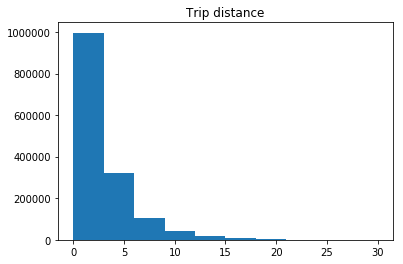

In [63]:
# trip_distance
print trip_distance.take(10)
trip_distance = trip_distance.collect()
plt.hist(trip_distance,range=[0, 30])
plt.title('Trip distance')

Text(0.5,1,'Extra Amount')

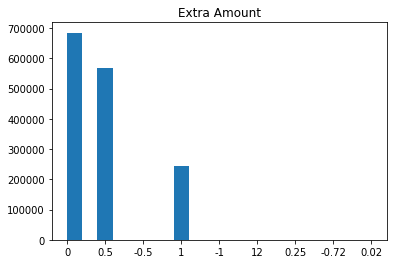

In [6]:
# Data visulization for Extra amount Count
Extra_count = taxi.map(lambda x: x.split(",")).map(lambda x: x[12]).collect()
plt.hist(Extra_count, 20)
plt.title('Extra Amount')

Text(0.5,1,'Passenger Count')

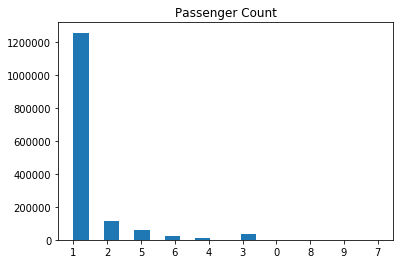

In [7]:
# Data visulization for Passenger Count
Passenger_count = taxi.map(lambda x: x.split(",")).map(lambda x: x[9]).collect()
plt.hist(Passenger_count, 20)
plt.title('Passenger Count')

In [8]:
# # Data visulization for Tip_amount
# Tip_amount = taxi.map(lambda x: x.split(",")).map(lambda x: x[14]).collect()
# plt.hist(Tip_amount, 5)
# plt.title('Tip_amount')

In [9]:
header.take(21)

[u'VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type']

In [67]:
print taxi.map(lambda x: x.split(",")).map(lambda x: x[15]).take(20)

[u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0']


Text(0.5,1,'Tolls_amount')

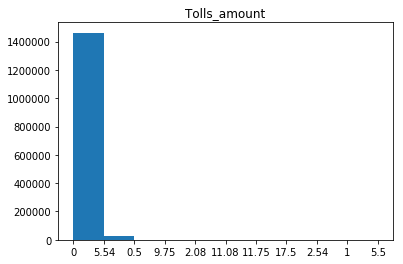

In [65]:
# Data visulization for Tolls_amount
Tolls_amount = taxi.map(lambda x: x.split(",")).map(lambda x: x[15]).collect()
plt.hist(Tolls_amount, range=[0, 10])
plt.title('Tolls_amount')

Text(0.5,1,'improvement_surcharge')

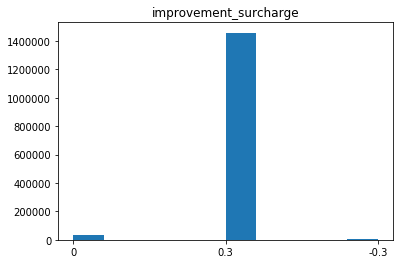

In [14]:
# Data visulization for improvement_surcharge
improvement_surcharge = taxi.map(lambda x: x.split(",")).map(lambda x: x[17]).collect()
plt.hist(improvement_surcharge, 10)
plt.title('improvement_surcharge')

In [4]:
# # Data visulization for Total_amount
# Total_amount = taxi.map(lambda x: x.split(",")).map(lambda x: x[18]).collect()
# plt.hist(Total_amount, 10)
# plt.title('Total_amount')

Text(0.5,1,'Payment_type')

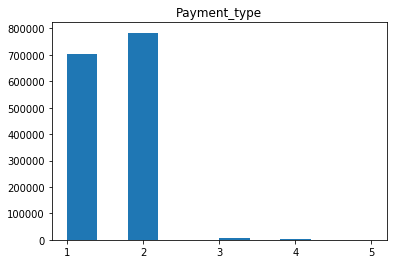

In [6]:
# Data visulization for Payment_type
Payment_type = taxi.map(lambda x: x.split(",")).map(lambda x: x[19]).collect()
plt.hist(Payment_type, 10)
plt.title('Payment_type')

Text(0.5,1,'Trip_type')

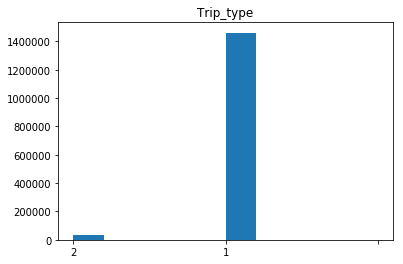

In [7]:
# Data visulization for Trip_type
Trip_type = taxi.map(lambda x: x.split(",")).map(lambda x: x[20]).collect()
plt.hist(Trip_type, 10)
plt.title('Trip_type')

Text(0.5,1,'MTA_Tax')

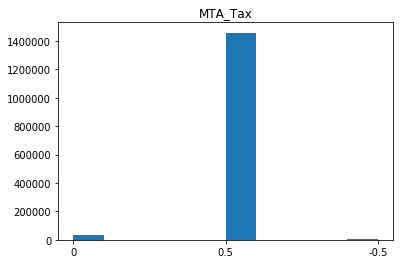

In [11]:
# Data visulization for MTA_Tax
MTA_Tax = taxi.map(lambda x: x.split(",")).map(lambda x: x[13]).collect()
plt.hist(MTA_Tax, 10)
plt.title('MTA_Tax')

Text(0.5,1,'VendorID')

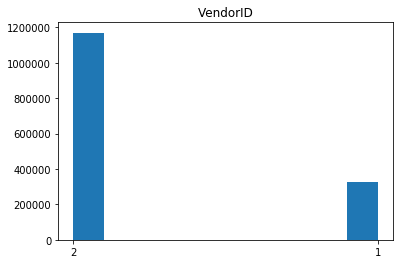

In [4]:
# Data visulization for VendorID
VendorID = taxi.map(lambda x: x.split(",")).map(lambda x: x[0]).collect()
plt.hist(VendorID, 10)
plt.title('VendorID')

Text(0.5,1,'Store_and_fwd_flag')

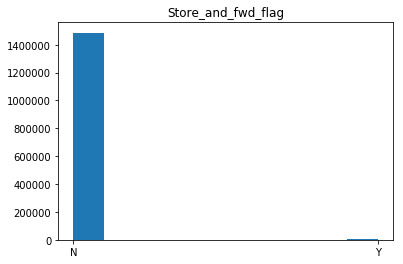

In [5]:
# Data visulization for Store_and_fwd_flag
Store_and_fwd_flag = taxi.map(lambda x: x.split(",")).map(lambda x: x[3]).collect()
plt.hist(Store_and_fwd_flag, 10)
plt.title('Store_and_fwd_flag')

Text(0.5,1,'RateCodeID')

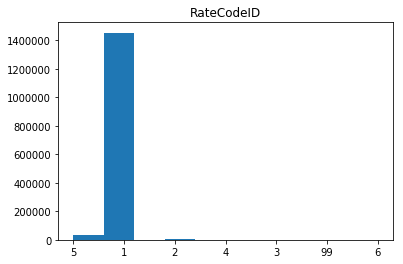

In [6]:
# Data visulization for RateCodeID
RateCodeID = taxi.map(lambda x: x.split(",")).map(lambda x: x[4]).collect()
plt.hist(RateCodeID, 10)
plt.title('RateCodeID')

In [27]:
#### Input data
sc = ss.sparkContext
#taxi = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09_small.csv")
header = sc.textFile("/scratch/ISE495/taxi_data/header.txt")
taxi1 = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09.csv")

In [28]:
taxi1.take(3)

[u'2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979484558105469,40.684955596923828,-73.97943115234375,40.685020446777344,1,.00,7.8,0,0,1.95,0,,0,9.75,1,2',
 u'2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010795593261719,40.912216186523438,-74.010780334472656,40.912212371826172,1,.00,45,0,0,0,0,,0,45,1,2',
 u'2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921409606933594,40.766708374023438,-73.914413452148438,40.764686584472656,1,.59,4,0.5,0.5,0.5,0,,0.3,5.8,1,1']

Now, we are answering the question about: In which hour of the day, there would be more inter-borough traffic than intra-borough traffic?

In [40]:
# Let's calculate Pick_up
def pick_up_total(s):
    t = s.split(",")
    hour = t[2].split(" ")[1]
    hour = int(hour.split(":")[0])
    return hour
    
pick_up_hour_count = taxi.map(pick_up_total).filter(lambda x: x is not None).map(lambda x: (x,1)).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)
result_total = pick_up_hour_count.collect()

print result_total

[(0, 877), (1, 123)]


In [41]:
# There are two hours values so it is needed to use large datasets

In [101]:
# Let's calculate Pick_up
def pick_up_total(s):
    t = s.split(",")
    hour = t[2].split(" ")[1]
    hour = int(hour.split(":")[0])
    return hour
    
pick_up_hour_count = taxi1.map(pick_up_total).filter(lambda x: x is not None).map(lambda x: (x,1)).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)
result_total = pick_up_hour_count.collect()

print result_total

[(0, 73063), (1, 56793), (2, 43489), (3, 32538), (4, 27959), (5, 17679), (6, 19947), (7, 35988), (8, 55153), (9, 62663), (10, 59248), (11, 56197), (12, 58017), (13, 57219), (14, 63628), (15, 71532), (16, 77997), (17, 85546), (18, 97428), (19, 96707), (20, 93742), (21, 86498), (22, 84604), (23, 81291)]


In [102]:
# Let's make graph for pick_up_hour
# x-axis: hour
# y-axis: count
count_total = list()
pick_up_total = list()
for i in pick_up_hour_count.map(lambda x: x[1]).collect():
    hour1 = float(i)
    count_total.append(hour1)   
for i in pick_up_hour_count.map(lambda x: x[0]).collect():
    hour2 = float(i)
    pick_up_total.append(hour2)

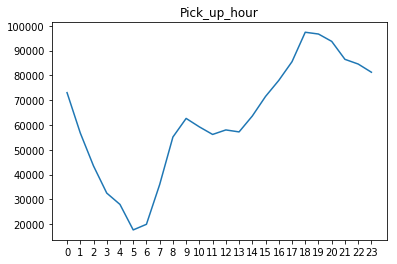

In [103]:
plt.title('Pick_up_hour')
plt.xticks(pick_up_total)
plt.plot(pick_up_total,count_total)

In [104]:
def pick_up_hour_NJ(s):
    t = s.split(",")
    x = float(t[5])
    y = float(t[6])
    a = float(t[7])
    b = float(t[8])        
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"
    if pick_up == "NJ" and drop_off == "NJ":
        hour1 = t[2]
        hour2 = hour1.split(" ")[1]
        hour3 = int(hour2.split(":")[0])
        return hour3

In [107]:
pick_up_hour_NJ_count = taxi.map(pick_up_hour_NJ).filter(lambda x: x is not None).map(lambda x: (x,1)).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)
result_NJ = pick_up_hour_NJ_count.collect()
print result_NJ

[(0, 13880), (1, 9202), (2, 6092), (3, 4136), (4, 3415), (5, 3219), (6, 6436), (7, 14834), (8, 23430), (9, 25732), (10, 23688), (11, 21939), (12, 21944), (13, 21119), (14, 22984), (15, 25927), (16, 27692), (17, 29414), (18, 31071), (19, 28565), (20, 25492), (21, 22190), (22, 19672), (23, 17057)]


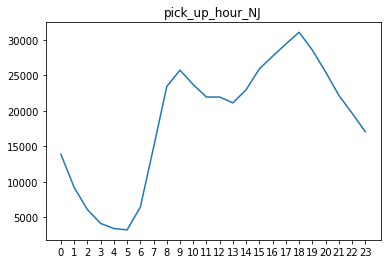

In [108]:
# Let's make graph for pick_up_hour_NJ
# x-axis: hour
# y-axis: count
pick_up_NJ = list()
count_NJ = list()
for i in pick_up_hour_NJ_count.map(lambda x: x[1]).collect():
    hour1 = float(i)
    count_NJ.append(hour1)
    
for i in pick_up_hour_NJ_count.map(lambda x: x[0]).collect():
    hour2 = float(i)
    pick_up_NJ.append(hour2)
plt.xticks(pick_up_NJ)
plt.title('pick_up_hour_NJ')
plt.plot(pick_up_NJ,count_NJ)

In [110]:
def pick_up_hour_NY(s):
    t = s.split(",")
    x = float(t[5])
    y = float(t[6])
    a = float(t[7])
    b = float(t[8])        
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"
    if pick_up == "NYC" and drop_off == "NYC":
        hour1 = t[2]
        hour2 = hour1.split(" ")[1]
        hour3 = int(hour2.split(":")[0])
        return hour3

In [111]:
pick_up_hour_NY_count = taxi.map(pick_up_hour_NY).filter(lambda x: x is not None).map(lambda x: (x,1)).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)
result_NY = pick_up_hour_NY_count.collect()
print result_NY

[(0, 49486), (1, 40330), (2, 31909), (3, 24240), (4, 20799), (5, 11268), (6, 9528), (7, 15053), (8, 23049), (9, 26480), (10, 26305), (11, 26985), (12, 28904), (13, 29561), (14, 34122), (15, 38565), (16, 42884), (17, 48410), (18, 57344), (19, 58764), (20, 58590), (21, 54436), (22, 54094), (23, 53447)]


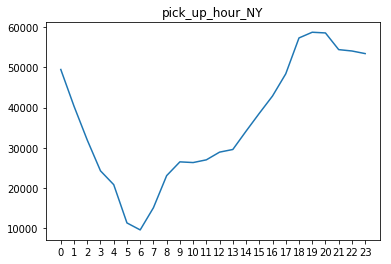

In [112]:
# Let's make graph for pick_up_hour_NY
# x-axis: hour
# y-axis: count
NY_pick_up = list()
NY_count = list()
for i in pick_up_hour_NY_count.map(lambda x: x[1]).collect():
    hour1 = float(i)
    NY_count.append(hour1)
    
for i in pick_up_hour_NY_count.map(lambda x: x[0]).collect():
    hour2 = float(i)
    NY_pick_up.append(hour2)
plt.xticks(NY_pick_up)
plt.title('pick_up_hour_NY')
plt.plot(NY_pick_up,NY_count)

In [113]:
def NY_to_NJ_pick_up_hour(s):
    t = s.split(",")
    x = float(t[5])
    y = float(t[6])
    a = float(t[7])
    b = float(t[8])        
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"
    if pick_up == "NYC" and drop_off == "NJ":
        hour1 = t[2]
        hour2 = hour1.split(" ")[1]
        hour3 = int(hour2.split(":")[0])
        return hour3

In [114]:
NY_to_NJ_pick_up_count = taxi1.map(NY_to_NJ_pick_up_hour).filter(lambda x: x is not None).map(lambda x: (x,1)).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)
NY_to_NJ_result = NY_to_NJ_pick_up_count.collect()
print NY_to_NJ_result

[(0, 8056), (1, 5997), (2, 4646), (3, 3580), (4, 3115), (5, 2523), (6, 3121), (7, 4886), (8, 7091), (9, 8804), (10, 7639), (11, 5800), (12, 5586), (13, 4875), (14, 4811), (15, 5137), (16, 5319), (17, 5541), (18, 6771), (19, 7307), (20, 7630), (21, 7912), (22, 8921), (23, 9042)]


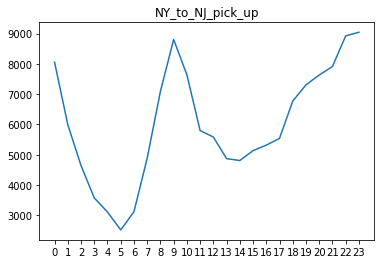

In [115]:
# Let's make graph for pick_up_hour_NY
# x-axis: hour
# y-axis: count
NY_to_NJ_pick_up = list()
NY_to_NJ_count = list()
for i in NY_to_NJ_pick_up_count.map(lambda x: x[1]).collect():
    hour1 = float(i)
    NY_to_NJ_count.append(hour1)   
for i in NY_to_NJ_pick_up_count.map(lambda x: x[0]).collect():
    hour2 = float(i)
    NY_to_NJ_pick_up.append(hour2)
plt.xticks(NY_to_NJ_pick_up)
plt.title('NY_to_NJ_pick_up')
plt.plot(NY_to_NJ_pick_up,NY_to_NJ_count)

In [116]:
def NJ_to_NY_pick_up_hour(s):
    t = s.split(",")
    x = float(t[5])
    y = float(t[6])
    a = float(t[7])
    b = float(t[8])        
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"
    if pick_up == "NJ" and drop_off == "NYC":
        hour1 = t[2]
        hour2 = hour1.split(" ")[1]
        hour3 = int(hour2.split(":")[0])
        return hour3

In [117]:
NJ_to_NY_pick_up_count = taxi1.map(NJ_to_NY_pick_up_hour).filter(lambda x: x is not None).map(lambda x: (x,1)).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)
NJ_to_NY_result = NJ_to_NY_pick_up_count.collect()
print NJ_to_NY_result

[(0, 1641), (1, 1264), (2, 842), (3, 582), (4, 630), (5, 669), (6, 862), (7, 1215), (8, 1583), (9, 1647), (10, 1616), (11, 1473), (12, 1583), (13, 1664), (14, 1711), (15, 1903), (16, 2102), (17, 2181), (18, 2242), (19, 2071), (20, 2030), (21, 1960), (22, 1917), (23, 1745)]


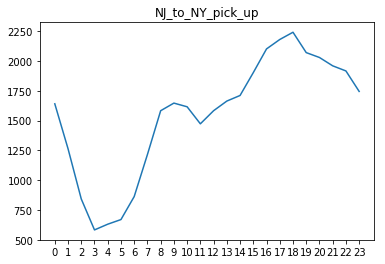

In [118]:
# Let's make graph for pick_up_hour_NY
# x-axis: hour
# y-axis: count
NJ_to_NY_pick_up = list()
NJ_to_NY_count = list()
for i in NJ_to_NY_pick_up_count.map(lambda x: x[0]).collect():
    hour1 = float(i)
    NJ_to_NY_pick_up.append(hour1)
for i in NJ_to_NY_pick_up_count.map(lambda x: x[1]).collect():
    hour2 = float(i)
    NJ_to_NY_count.append(hour2)   
plt.xticks(NJ_to_NY_pick_up)
plt.title('NJ_to_NY_pick_up')
plt.plot(NJ_to_NY_pick_up,NJ_to_NY_count)

In [159]:
def NJ_intra_fareAmount(s):
    t = s.split(",")
    fareAmount = t[11]
    fareAmount_NJ_intra_borough = []
    x = float(t[5])
    y = float(t[6])        
    a = float(t[7])
    b = float(t[8])
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"        
    if pick_up == "NJ" and drop_off == "NJ":
        fareAmount_NJ_intra_borough.append(fareAmount)        
    return fareAmount_NJ_intra_borough    
print taxi.flatMap(NJ_intra_fareAmount).collect()

[u'45', u'5.5', u'5', u'5.5', u'3.5', u'4', u'7.5', u'5.5', u'3.5', u'8', u'4.5', u'4', u'7.5', u'4', u'5.5', u'4', u'4', u'4.5', u'6', u'4', u'3', u'9.5', u'4.5', u'10', u'5.5', u'6', u'4', u'6.5', u'10.5', u'11.5', u'6.5', u'8.5', u'6.5', u'5.5', u'5.5', u'4.5', u'7', u'6', u'5.5', u'5', u'6', u'6', u'15', u'7', u'4', u'11', u'2.5', u'5.5', u'3.5', u'6', u'6', u'9.5', u'7', u'8.5', u'5', u'8.5', u'3', u'5.5', u'9', u'10', u'11.5', u'6.5', u'10', u'6.5', u'4', u'6', u'9', u'3', u'5.5', u'6.5', u'6', u'5.5', u'6.5', u'9', u'8', u'20', u'22', u'6', u'4.5', u'16.5', u'7.5', u'10.5', u'16.5', u'6', u'14', u'11.5', u'4', u'9', u'10', u'14', u'9', u'2.5', u'10', u'7', u'4.5', u'6.5', u'9', u'5', u'7', u'8', u'4.5', u'4.5', u'7', u'8.5', u'7.5', u'7.5', u'9.5', u'18', u'12.5', u'7.5', u'17', u'25', u'15', u'14.5', u'5', u'7', u'9.5', u'14.5', u'4.5', u'10', u'5.5', u'5', u'7.5', u'10.5', u'6', u'11.5', u'3.5', u'20', u'16', u'19', u'5.5', u'7', u'10', u'9.5', u'14', u'4.5', u'6.5', u'8', u'6

In [160]:
# Fare_amount_NJ_Intra
fare_amount_nj = 0.0
for x in taxi.flatMap(NJ_intra_fareAmount).collect():
    fare_amount = float(x)
    fare_amount_nj = fare_amount_nj + fare_amount
print fare_amount_nj/len(taxi.flatMap(NJ_intra_fareAmount).collect())
print fare_amount_nj

8.8422459893
1653.5


In [161]:
def NY_intra_fareAmount(s):
    t = s.split(",")
    fareAmount = t[11]
    fareAmount_NY_intra_borough = []    
    x = float(t[5])
    y = float(t[6])        
    a = float(t[7])
    b = float(t[8])
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"    
    if pick_up == "NYC" and drop_off == "NYC":
        fareAmount_NY_intra_borough.append(fareAmount)
        
    return fareAmount_NY_intra_borough
    
print taxi.flatMap(NY_intra_fareAmount).collect()

[u'7.8', u'4', u'5', u'5', u'6.5', u'6', u'5.5', u'5', u'4', u'7.5', u'5', u'7.5', u'8', u'6', u'7', u'10.5', u'6.5', u'10.5', u'2.5', u'7.5', u'16.5', u'52', u'3.5', u'5', u'9', u'7', u'5', u'5', u'3.5', u'6', u'9', u'4.5', u'35', u'6.5', u'6', u'4', u'5', u'4.5', u'8.5', u'11', u'7', u'7', u'8', u'5.5', u'8', u'6.5', u'6', u'5', u'6', u'8', u'5', u'6', u'4.5', u'12', u'9', u'7', u'21.5', u'6', u'7.5', u'24', u'5', u'10', u'10.5', u'5', u'7.5', u'5', u'9', u'7', u'5.5', u'6.5', u'4', u'11.5', u'9', u'10.5', u'15', u'9.5', u'6.5', u'8', u'8', u'6.5', u'5', u'5.5', u'5.5', u'2.5', u'24.5', u'4.5', u'14', u'6.5', u'8', u'12.5', u'15', u'18.5', u'35', u'12.5', u'5', u'8', u'52', u'21', u'5', u'8', u'7.5', u'12', u'11', u'9.5', u'8.5', u'12', u'4', u'12.5', u'5', u'5.5', u'8.5', u'9', u'7.5', u'3', u'0', u'7.5', u'5.5', u'8', u'11.5', u'11', u'16.5', u'10', u'11.5', u'6.5', u'4.5', u'9', u'6', u'7.5', u'4.5', u'10.5', u'2.5', u'-2.5', u'14', u'7.5', u'10', u'4', u'5.5', u'11', u'20.5', u'3

In [162]:
# Fare_amount_NY_Intra
fare_amount_ny = 0.0
for x in taxi.flatMap(NY_intra_fareAmount).collect():
    fare_amount = float(x)
    fare_amount_ny = fare_amount_ny + fare_amount
print fare_amount_ny/len(taxi.flatMap(NY_intra_fareAmount).collect())
print fare_amount_ny

10.6281567489
7322.8


In [163]:
def NYNJ_inter_fareAmount(s):
    t = s.split(",")
    fareAmount = t[11]
    fareAmount_NYNJ_inter_borough = []
    x = float(t[5])
    y = float(t[6])        
    a = float(t[7])
    b = float(t[8])
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"
    if pick_up == "NYC" and drop_off == "NJ" or pick_up == "NJ" and drop_off == "NYC":
        fareAmount_NYNJ_inter_borough.append(fareAmount)        
    return fareAmount_NYNJ_inter_borough    
print taxi.flatMap(NYNJ_inter_fareAmount).collect()

[u'8', u'18', u'13.5', u'13.5', u'19.5', u'18', u'10', u'12', u'28.5', u'27.5', u'14.5', u'18.5', u'16', u'16', u'15', u'12.5', u'15', u'18', u'20', u'16.5', u'29', u'26', u'18.5', u'32', u'36.5', u'18', u'22', u'28.5', u'32.5', u'24.5', u'25.5', u'19', u'23.5', u'30', u'18', u'15', u'31', u'34', u'12.5', u'17.5', u'16', u'30', u'38', u'36.5', u'12', u'27.5', u'30', u'28', u'25', u'26', u'9', u'25.5', u'30.5', u'21', u'36', u'30', u'9.5', u'16', u'21.5', u'31.5', u'33.5', u'44.5', u'30.5', u'32', u'16', u'30.5', u'36.5', u'35', u'22', u'30', u'20.5', u'14.5', u'11.5', u'11', u'14.5', u'14.5', u'17.5', u'20', u'33', u'15.5', u'16.5', u'25.5', u'30', u'17', u'14.5', u'12', u'27.5', u'46.5', u'32.5', u'26', u'20.5', u'28', u'23.5', u'19.5', u'10.5', u'13.5', u'26', u'18', u'19', u'34', u'37', u'12', u'26', u'15.5', u'14', u'19', u'70', u'45.5', u'26', u'36.5', u'46', u'46.5', u'36', u'18.5', u'56', u'37.5', u'26.5', u'62', u'66', u'15.5', u'45', u'21', u'52.5', u'48.5']


In [164]:
# Fare_amount_NYNJ_Inter
fare_amount_nynj = 0.0
for x in taxi.flatMap(NYNJ_inter_fareAmount).collect():
    fare_amount = float(x)
    fare_amount_nynj = fare_amount_nynj + fare_amount
print fare_amount_nynj/len(taxi.flatMap(NYNJ_inter_fareAmount).collect())
print fare_amount_nynj

25.3709677419
3146.0


In [165]:
def nj_trip_distance(s):
    t = s.split(",")

    trip_distance_NJ_intra = []
    trip_distance = t[10]

    y = float(t[6])
    x = float(t[5])
    b = float(t[8])
    a = float(t[7])    
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"    
    if pick_up == "NJ" and drop_off == "NJ":
        trip_distance_NJ_intra.append(trip_distance)   
    return trip_distance_NJ_intra   
print taxi.flatMap(nj_trip_distance).collect()

[u'.00', u'1.07', u'.90', u'1.01', u'.39', u'.56', u'1.80', u'.82', u'.00', u'1.97', u'.85', u'.65', u'1.47', u'.46', u'1.19', u'.44', u'.40', u'.60', u'1.20', u'.49', u'.15', u'2.01', u'.63', u'.04', u'1.02', u'1.40', u'.72', u'1.29', u'2.37', u'2.93', u'1.33', u'1.68', u'1.18', u'.90', u'1.11', u'.69', u'1.38', u'1.20', u'.89', u'.93', u'1.19', u'1.22', u'3.20', u'1.57', u'.59', u'2.96', u'.05', u'1.06', u'.54', u'1.25', u'1.23', u'2.29', u'.00', u'1.88', u'.77', u'1.92', u'.22', u'1.03', u'2.17', u'.54', u'2.92', u'1.05', u'2.44', u'1.55', u'.49', u'.92', u'2.95', u'.11', u'1.07', u'1.12', u'1.11', u'.95', u'1.18', u'1.80', u'1.40', u'5.69', u'7.50', u'1.08', u'.82', u'4.63', u'1.42', u'2.34', u'4.52', u'1.08', u'4.11', u'2.89', u'.43', u'1.96', u'2.52', u'4.28', u'2.05', u'.12', u'1.88', u'1.94', u'.88', u'1.11', u'2.34', u'.78', u'1.44', u'1.66', u'.70', u'.60', u'1.49', u'1.93', u'1.62', u'1.45', u'2.21', u'5.90', u'2.98', u'1.48', u'4.18', u'7.38', u'5.00', u'4.17', u'.85', u'1.

In [166]:
#NJ_Intra trip distance
trip_distance_nj = 0.0
for x in taxi.flatMap(nj_trip_distance).collect():
    trip_distance = float(x)
    trip_distance_nj = trip_distance_nj + trip_distance
print trip_distance_nj

362.87


In [167]:
def ny_trip_distance(s):
    t = s.split(",")
    trip_distance_NY_intra = []
    trip_distance = t[10]
    y = float(t[6])
    x = float(t[5])
    b = float(t[8])
    a = float(t[7])    
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"    
    if pick_up == "NYC" and drop_off == "NYC":
        trip_distance_NY_intra.append(trip_distance)   
    return trip_distance_NY_intra  
print taxi.flatMap(nj_trip_distance).collect()

[u'.00', u'1.07', u'.90', u'1.01', u'.39', u'.56', u'1.80', u'.82', u'.00', u'1.97', u'.85', u'.65', u'1.47', u'.46', u'1.19', u'.44', u'.40', u'.60', u'1.20', u'.49', u'.15', u'2.01', u'.63', u'.04', u'1.02', u'1.40', u'.72', u'1.29', u'2.37', u'2.93', u'1.33', u'1.68', u'1.18', u'.90', u'1.11', u'.69', u'1.38', u'1.20', u'.89', u'.93', u'1.19', u'1.22', u'3.20', u'1.57', u'.59', u'2.96', u'.05', u'1.06', u'.54', u'1.25', u'1.23', u'2.29', u'.00', u'1.88', u'.77', u'1.92', u'.22', u'1.03', u'2.17', u'.54', u'2.92', u'1.05', u'2.44', u'1.55', u'.49', u'.92', u'2.95', u'.11', u'1.07', u'1.12', u'1.11', u'.95', u'1.18', u'1.80', u'1.40', u'5.69', u'7.50', u'1.08', u'.82', u'4.63', u'1.42', u'2.34', u'4.52', u'1.08', u'4.11', u'2.89', u'.43', u'1.96', u'2.52', u'4.28', u'2.05', u'.12', u'1.88', u'1.94', u'.88', u'1.11', u'2.34', u'.78', u'1.44', u'1.66', u'.70', u'.60', u'1.49', u'1.93', u'1.62', u'1.45', u'2.21', u'5.90', u'2.98', u'1.48', u'4.18', u'7.38', u'5.00', u'4.17', u'.85', u'1.

In [168]:
#NJ_Intra trip distance
trip_distance_ny = 0.0
for x in taxi.flatMap(ny_trip_distance).collect():
    trip_distance = float(x)
    trip_distance_ny = trip_distance_ny + trip_distance
print trip_distance_ny

1788.49


In [169]:
def nynj_trip_distance(s):
    t = s.split(",")
    trip_distance_NYNJ_inter = []
    trip_distance = t[10]
    y = float(t[6])
    x = float(t[5])
    b = float(t[8])
    a = float(t[7])    
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"
    if pick_up == "NYC" and drop_off == "NJ" or pick_up == "NJ" and drop_off == "NYC":
        trip_distance_NYNJ_inter.append(trip_distance)
   
    return trip_distance_NYNJ_inter 

print taxi.flatMap(nynj_trip_distance).collect()

[u'1.83', u'4.68', u'4.00', u'3.14', u'5.94', u'4.96', u'4.36', u'3.26', u'9.81', u'9.58', u'4.11', u'5.71', u'4.75', u'4.61', u'4.57', u'3.92', u'4.26', u'4.64', u'6.04', u'4.57', u'9.88', u'8.08', u'5.55', u'10.86', u'12.57', u'5.35', u'7.15', u'9.45', u'11.65', u'7.36', u'8.59', u'5.94', u'6.78', u'10.29', u'5.68', u'3.93', u'10.47', u'12.38', u'3.02', u'5.20', u'4.90', u'9.80', u'13.18', u'11.82', u'3.22', u'7.58', u'9.76', u'9.54', u'7.01', u'9.18', u'2.08', u'7.57', u'10.78', u'6.35', u'12.16', u'9.65', u'2.42', u'4.93', u'5.78', u'10.96', u'11.35', u'14.65', u'10.45', u'10.95', u'4.75', u'9.92', u'12.55', u'11.38', u'6.61', u'11.42', u'5.93', u'4.65', u'3.01', u'2.87', u'4.00', u'3.55', u'5.54', u'6.37', u'11.07', u'4.57', u'5.23', u'8.74', u'10.54', u'5.40', u'4.25', u'3.13', u'9.35', u'16.51', u'10.47', u'8.20', u'6.91', u'9.53', u'7.29', u'5.44', u'2.50', u'3.94', u'7.58', u'5.33', u'5.68', u'11.65', u'12.57', u'3.03', u'7.88', u'4.08', u'4.39', u'5.21', u'18.63', u'14.48', u

In [170]:
#NYNJ_Inter trip distance
trip_distance_nynj = 0.0
for x in taxi.flatMap(nynj_trip_distance).collect():
    trip_distance = float(x)
    trip_distance_nynj = trip_distance_nynj + trip_distance
print trip_distance_nynj

973.24


In [12]:
# Pick up hours and average Trip Distance
def pick_up_trip_distance(s):
    t = s.split(",")
    pick_up_datetime = t[1]
    pick_up_time = pick_up_datetime.split(" ")[1]
    pick_up_hour = int(pick_up_time.split(":")[0])
    trip_distance = float(t[10])
    return (pick_up_hour, trip_distance)
pickup_hour_trip_distance = taxi.map(pick_up_trip_distance).groupByKey().mapValues(lambda x: float(sum(x))/len(x)).sortByKey()
print pickup_hour_trip_distance.count()
print pickup_hour_trip_distance.collect()

24
[(0, 3.1152760653979947), (1, 3.0173471816711075), (2, 3.0461755995727726), (3, 3.212945322376736), (4, 3.5265550257341904), (5, 4.133474251497002), (6, 4.0551488948692), (7, 3.2843944447091484), (8, 3.0484495887390795), (9, 2.9991052283683133), (10, 2.9444823205958084), (11, 2.91201546019617), (12, 2.9030647783080843), (13, 2.878294448214058), (14, 2.864304272170882), (15, 2.8570399989155826), (16, 2.779851560822151), (17, 2.679113857899167), (18, 2.653222067972645), (19, 2.715596883743644), (20, 2.7770517155918055), (21, 2.9991886114417152), (22, 3.185393542293826), (23, 3.191537940973769)]


In [13]:
# Let's draw the plot between pick up hour and trip distance
average_trip_distance = list()
pick_up_hour_trip_distance = list()
for i in pickup_hour_trip_distance.map(lambda x: x[1]).collect():
    v = float(i)
    average_trip_distance.append(v)    
for i in pickup_hour_trip_distance.map(lambda x: x[0]).collect():
    v = float(i)
    pick_up_hour_trip_distance.append(v)

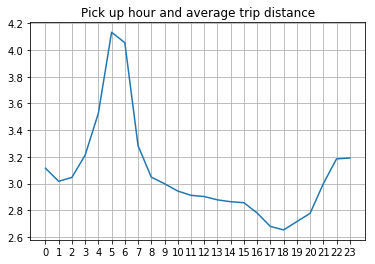

In [14]:
plt.title('Pick up hour and average trip distance')
plt.xticks(pick_up_hour_trip_distance)
plt.grid(True)
plt.plot(pick_up_hour_trip_distance, average_trip_distance)

In [36]:
# drop off hours and average Trip Distance
def drop_off_trip_distance(s):
    t = s.split(",")
    drop_off_datetime = t[2]
    drop_off_time = drop_off_datetime.split(" ")[1]
    drop_off_hour = int(drop_off_time.split(":")[0])
    trip_distance = float(t[10])
    return (drop_off_hour, trip_distance)
dropoff_hour_trip_distance = taxi.map(drop_off_trip_distance).groupByKey().mapValues(lambda x: float(sum(x))/len(x)).sortByKey()
print dropoff_hour_trip_distance.count()
print dropoff_hour_trip_distance.collect()

24
[(0, 3.239356172070663), (1, 3.1305308752839545), (2, 3.143714502517856), (3, 3.225472678099464), (4, 3.4637977037805343), (5, 4.1878409412297035), (6, 3.932659547801691), (7, 3.217171279315312), (8, 2.9237789422153124), (9, 3.0169953561112433), (10, 3.010999021063997), (11, 2.8795594070857966), (12, 2.9075129703362896), (13, 2.8894311330152505), (14, 2.7672549820833736), (15, 2.771892579544865), (16, 2.7664040924650566), (17, 2.690678231594695), (18, 2.6734912961366484), (19, 2.7468900906862763), (20, 2.8000490708540564), (21, 2.9310688108395735), (22, 3.147097182166325), (23, 3.231312445412144)]


In [37]:
# Let's draw the plot between pick up hour and trip distance
average_trip_distance = list()
drop_off_hour_trip_distance = list()
for i in dropoff_hour_trip_distance.map(lambda x: x[1]).collect():
    v = float(i)
    average_trip_distance.append(v)    
for i in dropoff_hour_trip_distance.map(lambda x: x[0]).collect():
    v = float(i)
    drop_off_hour_trip_distance.append(v)

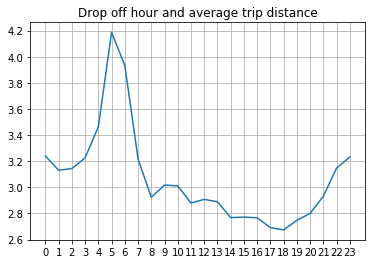

In [38]:
plt.title('Drop off hour and average trip distance')
plt.xticks(drop_off_hour_trip_distance)
plt.grid(True)
plt.plot(drop_off_hour_trip_distance, average_trip_distance)

In [15]:
# Pick up hours and average fare amount
def pick_up_fare_amount(s):
    t = s.split(",")
    pick_up_datetime = t[1]
    pick_up_time = pick_up_datetime.split(" ")[1]
    pick_up_hour = int(pick_up_time.split(":")[0])
    fare_amount = float(t[11])
    return (pick_up_hour, fare_amount)
pickup_hour_fare_amount = taxi.map(pick_up_fare_amount).groupByKey().mapValues(lambda x: float(sum(x))/len(x)).sortByKey()
print pickup_hour_fare_amount.count()
print pickup_hour_fare_amount.collect()

24
[(0, 12.433590041394922), (1, 11.971902255778922), (2, 11.994295562675989), (3, 12.402056890012645), (4, 13.27688692098093), (5, 14.848548502994012), (6, 14.846629461331453), (7, 13.469711277335751), (8, 13.25477062664293), (9, 13.040831089686755), (10, 12.720612340780956), (11, 12.673480833230625), (12, 12.623983191533512), (13, 12.555489152182615), (14, 12.72297641905676), (15, 12.835575856974398), (16, 12.71178859734452), (17, 12.286484969666674), (18, 11.892593860866878), (19, 11.798506672491447), (20, 11.746304896183293), (21, 12.191375847844421), (22, 12.745466265273608), (23, 12.751105332414312)]


In [16]:
# Let's draw the plot between pick up hour and fare amount
average_fare_amount = list()
pick_up_hour_fare_amount = list()
for i in pickup_hour_fare_amount.map(lambda x: x[1]).collect():
    v = float(i)
    average_fare_amount.append(v)    
for i in pickup_hour_fare_amount.map(lambda x: x[0]).collect():
    v = float(i)
    pick_up_hour_fare_amount.append(v)

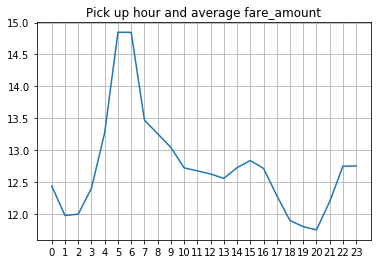

In [19]:
plt.title('Pick up hour and average fare_amount')
plt.xticks(pick_up_hour_fare_amount)
plt.grid(True)
plt.plot(pick_up_hour_fare_amount, average_fare_amount)

In [20]:
def NY_NJ_fare_amount(s):
    t = s.split(",") # t is taxi data file
    
    fare_amount = float(t[11])
    
    x = float(t[5]) # -73.979484558105469
    y = float(t[6]) # 40.684955596923828
    a = float(t[7]) # 73.97943115234375
    b = float(t[8]) # 40.685020446777344    
    if y < 1.323942 * x + 138.669195:
        pick_up = "NYC"
    else:
        pick_up = "NJ"
    if b < 1.323942 * a + 138.669195:
        drop_off = "NYC"
    else:
        drop_off = "NJ"
    return ((pick_up, drop_off), fare_amount)
taxi_NY_NJ_fare_amount = taxi.map(NY_NJ_fare_amount).groupByKey().mapValues(lambda x: float(sum(x))/len(x)).sortByKey()
print taxi_NY_NJ_fare_amount.count()
print taxi_NY_NJ_fare_amount.collect()

4
[(('NJ', 'NJ'), 10.56642849509047), (('NJ', 'NYC'), 25.01336600867153), (('NYC', 'NJ'), 21.94314905280687), (('NYC', 'NYC'), 11.467664249618002)]


In [32]:
# Let's draw the plot between pick up hour and fare amount
NY_NJ_average_fare_amount = list()
NY_NJ_fare_amount_category = list()
for i in taxi_NY_NJ_fare_amount.map(lambda x: x[1]).collect():
    v = float(i)
    NY_NJ_average_fare_amount.append(v)    
for i in taxi_NY_NJ_fare_amount.map(lambda x: x[0]).collect():
    v = str(i)
    NY_NJ_fare_amount_category.append(v)

<BarContainer object of 4 artists>

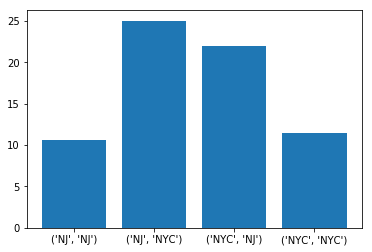

In [33]:
# Let's make some data visualizations about it.
plt.bar(NY_NJ_fare_amount_category,NY_NJ_average_fare_amount)

We also try to answer the question about "What are the differences between short and long distance trips of taking taxi?"

In [72]:
# trip_distance
trip_distance = taxi.map(lambda x: float(x.split(",")[10]))

In [73]:
print trip_distance.take(10)

[0.0, 0.0, 0.59, 0.74, 0.61, 1.07, 1.43, 0.9, 1.33, 0.84]


Text(0.5,1,'Trip distance')

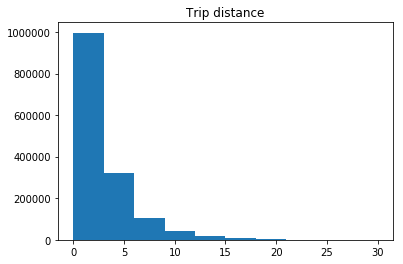

In [74]:
trip_distance = trip_distance.collect()
plt.hist(trip_distance,range=[0, 30])
plt.title('Trip distance')

In [ ]:
#1.3 Pick up hours & Mean Trip Distance
def pick_up(line):
    splitData = line.split(",")
    key = splitData[1]
    key2 = key.split(" ")[1]
    key3 = int(key2.split(":")[0])
    value = float(splitData[10])
    return (key3, value)
Pick_Up_Hour = data.map(pick_up).groupByKey().mapValues(lambda x: float(sum(x))/len(x)).sortByKey()
print Pick_Up_Hour.count()
print Pick_Up_Hour.collect()

In [76]:
trip_distance = taxi.map(lambda x: float(x.split(",")[10]))

In [77]:
print trip_distance.take(20)

[0.0, 0.0, 0.59, 0.74, 0.61, 1.07, 1.43, 0.9, 1.33, 0.84, 0.8, 0.7, 1.01, 0.39, 0.56, 1.8, 1.46, 0.88, 1.73, 0.82]


In [80]:
short_trip_distance = trip_distance.filter(lambda x: x < 30)
short_trip_distance = short_trip_distance.collect()
for i in short_trip_distance[0:20]:
    print i

0.0
0.0
0.59
0.74
0.61
1.07
1.43
0.9
1.33
0.84
0.8
0.7
1.01
0.39
0.56
1.8
1.46
0.88
1.73
0.82


In [81]:
long_trip_distance = trip_distance.filter(lambda x: x >= 30)
long_trip_distance = long_trip_distance.collect()
for i in long_trip_distance[0:20]:
    print i

33.6
47.6
32.41
37.43
32.8
33.9
55.16
38.74
30.0
33.87
32.6
32.43
42.56
35.01
40.58
36.4
30.89
35.11
41.7
44.1


Text(0.5,1,'Short trip distance')

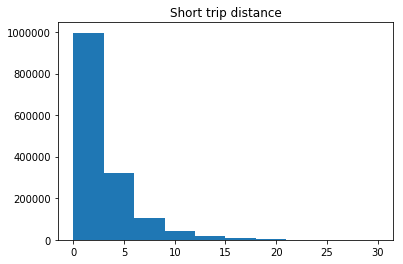

In [88]:
# short distance
plt.hist(short_trip_distance, range=[0, 30])
plt.title('Short trip distance')

Text(0.5,1,'Long trip distance')

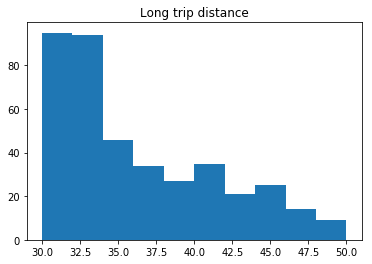

In [89]:
# long distance
plt.hist(long_trip_distance, range=[30, 50])
plt.title('Long trip distance')

Let's check short trip(<30 miles)

In [165]:
# short trip
def pick_up_short_trip_distance(s):
    t = s.split(",")
    pick_up_short_trip_datetime = t[1]
    pick_up_short_trip_time = pick_up_short_trip_datetime.split(" ")[1]
    pick_up_short_trip_hour = int(pick_up_short_trip_time.split(":")[0])
    short_trip_distance = float(t[10])
    return (pick_up_short_trip_hour, short_trip_distance)
pickup_hour_short_trip_distance = taxi.map(pick_up_short_trip_distance).filter(lambda x: x[1] < 30).groupByKey().mapValues(lambda x: float(sum(x))/len(x)).sortByKey()
print pickup_hour_short_trip_distance.count()
print pickup_hour_short_trip_distance.collect()

24
[(0, 3.1036257205415683), (1, 3.00488317148491), (2, 3.0312715218922253), (3, 3.177189476347089), (4, 3.5184771746536283), (5, 4.122908056304279), (6, 4.021919713831482), (7, 3.2751870561883423), (8, 3.0368362569131038), (9, 2.9851628094508675), (10, 2.9311927100558437), (11, 2.8963760635580647), (12, 2.89151733204179), (13, 2.860545672909599), (14, 2.8555768451692933), (15, 2.8422439183141854), (16, 2.7692175495349685), (17, 2.666980954112609), (18, 2.6468822700579064), (19, 2.7091834760264786), (20, 2.766617011899557), (21, 2.985206722378304), (22, 3.1723440839897386), (23, 3.1816361835755194)]


In [163]:
# short trip
count_short_trip_distance = list()
pick_up_hour_short_trip_distance = list()
for i in pickup_hour_short_trip_distance1.map(lambda x: x[1]).collect():
    v = float(i)
    count_short_trip_distance.append(v)    
for i in pickup_hour_short_trip_distance1.map(lambda x: x[0]).collect():
    v = float(i)
    pick_up_hour_short_trip_distance.append(v)

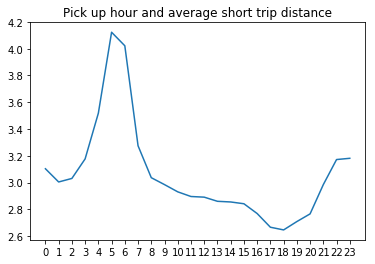

In [164]:
plt.title('Pick up hour and average short trip distance')
plt.xticks(pick_up_hour_short_trip_distance)
plt.plot(pick_up_hour_short_trip_distance, average_short_trip_distance)

In [134]:
# long trip
def pick_up_long_trip_distance(s):
    t = s.split(",")
    pick_up_long_trip_datetime = t[1]
    pick_up_long_trip_time = pick_up_long_trip_datetime.split(" ")[1]
    pick_up_long_trip_hour = int(pick_up_long_trip_time.split(":")[0])
    long_trip_distance = float(t[10])
    return (pick_up_long_trip_hour, long_trip_distance)
pickup_hour_long_trip_distance = taxi.map(pick_up_long_trip_distance).filter(lambda x: x[1] > 30).groupByKey().mapValues(lambda x: float(sum(x))/len(x)).sortByKey()
print pickup_hour_long_trip_distance.count()
print pickup_hour_long_trip_distance.collect()

24
[(0, 40.36142857142857), (1, 38.74), (2, 39.14823529411765), (3, 73.884375), (4, 39.093333333333334), (5, 39.413999999999994), (6, 36.77), (7, 35.48416666666667), (8, 39.077894736842104), (9, 42.29454545454544), (10, 43.12736842105264), (11, 39.903749999999995), (12, 44.626875000000005), (13, 43.66639999999998), (14, 37.07941176470588), (15, 38.05548387096775), (16, 42.85285714285714), (17, 47.16541666666666), (18, 46.683571428571426), (19, 46.75142857142857), (20, 40.6592), (21, 49.524999999999984), (22, 42.64928571428572), (23, 36.102916666666665)]


In [135]:
# long trip
average_long_trip_distance = list()
pick_up_hour_long_trip_distance = list()
for i in pickup_hour_long_trip_distance.map(lambda x: x[1]).collect():
    v = float(i)
    average_long_trip_distance.append(v)    
for i in pickup_hour_long_trip_distance.map(lambda x: x[0]).collect():
    v = float(i)
    pick_up_hour_long_trip_distance.append(v)

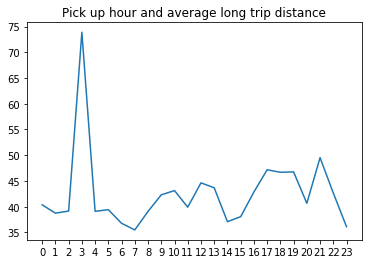

In [136]:
plt.title('Pick up hour and average long trip distance')
plt.xticks(pick_up_hour_long_trip_distance)
plt.plot(pick_up_hour_long_trip_distance, average_long_trip_distance)

In [168]:
# short trip
def pick_up_short_trip_distance(s):
    t = s.split(",")
    pick_up_short_trip_datetime = t[1]
    pick_up_short_trip_time = pick_up_short_trip_datetime.split(" ")[1]
    pick_up_short_trip_hour = int(pick_up_short_trip_time.split(":")[0])
    short_trip_distance = float(t[10])
    return (pick_up_short_trip_hour, short_trip_distance)

In [169]:
pickup_hour_short_trip_distance1 = taxi.map(pick_up_short_trip_distance).filter(lambda x: x[1] < 30).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)

In [170]:
print pickup_hour_short_trip_distance1.collect()

[(0, 208368.1199999999), (1, 161524.48999999993), (2, 124824.72999999992), (3, 100475.44000000006), (4, 92951.12999999998), (5, 68831.95), (6, 91072.35000000011), (7, 137446.49999999997), (8, 179009.35000000027), (9, 185095.02), (10, 168394.08999999997), (11, 164418.58000000002), (12, 167164.39999999988), (13, 164344.06999999998), (14, 190315.6300000005), (15, 209604.12000000017), (16, 219144.80000000002), (17, 234688.98999999973), (18, 257359.01000000015), (19, 260425.6799999997), (20, 251098.1600000001), (21, 258271.12999999983), (22, 268624.58000000037), (23, 253802.30000000002)]


In [171]:
# short trip
count_short_trip_distance1 = list()
pick_up_hour_short_trip_distance1 = list()
for i in pickup_hour_short_trip_distance1.map(lambda x: x[1]).collect():
    v = float(i)
    count_short_trip_distance1.append(v)    
for i in pickup_hour_short_trip_distance1.map(lambda x: x[0]).collect():
    v = float(i)
    pick_up_hour_short_trip_distance1.append(v)

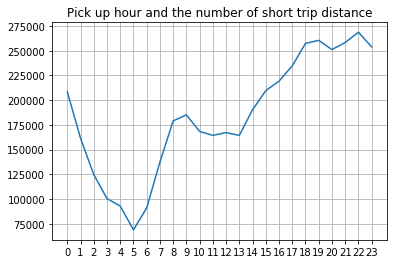

In [181]:
plt.title('Pick up hour and the number of short trip distance')
plt.xticks(pick_up_hour_short_trip_distance1)
plt.plot(pick_up_hour_short_trip_distance1, count_short_trip_distance1)
plt.grid(True)

In [173]:
# long trip
def pick_up_long_trip_distance(s):
    t = s.split(",")
    pick_up_long_trip_datetime = t[1]
    pick_up_long_trip_time = pick_up_long_trip_datetime.split(" ")[1]
    pick_up_long_trip_hour = int(pick_up_long_trip_time.split(":")[0])
    long_trip_distance = float(t[10])
    return (pick_up_long_trip_hour, long_trip_distance)

In [175]:
pickup_hour_long_trip_distance1 = taxi.map(pick_up_long_trip_distance).filter(lambda x: x[1] >= 30).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)

In [176]:
print pickup_hour_long_trip_distance1.collect()

[(0, 847.59), (1, 727.32), (2, 665.52), (3, 1182.15), (4, 234.56), (5, 197.07), (6, 845.7099999999999), (7, 425.80999999999995), (8, 742.48), (9, 930.48), (10, 819.4200000000001), (11, 957.69), (12, 714.03), (13, 1091.66), (14, 630.35), (15, 1179.7200000000003), (16, 899.9100000000001), (17, 1131.97), (18, 653.5699999999999), (19, 654.52), (20, 1016.48), (21, 1287.65), (22, 1194.18), (23, 866.4699999999999)]


In [177]:
# long trip
count_long_trip_distance1 = list()
pick_up_hour_long_trip_distance1 = list()
for i in pickup_hour_long_trip_distance1.map(lambda x: x[1]).collect():
    v = float(i)
    count_long_trip_distance1.append(v)    
for i in pickup_hour_long_trip_distance1.map(lambda x: x[0]).collect():
    v = float(i)
    pick_up_hour_long_trip_distance1.append(v)

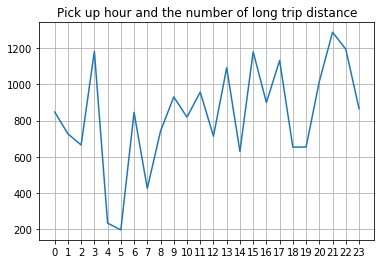

In [179]:
plt.title('Pick up hour and the number of long trip distance')
plt.xticks(pick_up_hour_long_trip_distance1)
plt.plot(pick_up_hour_long_trip_distance1, count_long_trip_distance1)
plt.grid(True)

In [182]:
# short trip
def drop_off_short_trip_distance(s):
    t = s.split(",")
    drop_off_short_trip_datetime = t[2]
    drop_off_short_trip_time = drop_off_short_trip_datetime.split(" ")[1]
    drop_off_short_trip_hour = int(drop_off_short_trip_time.split(":")[0])
    short_trip_distance = float(t[10])
    return (drop_off_short_trip_hour, short_trip_distance)

In [183]:
dropoff_hour_short_trip_distance1 = taxi.map(drop_off_short_trip_distance).filter(lambda x: x[1] < 30).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)

In [184]:
print dropoff_hour_short_trip_distance1.collect()

[(0, 235235.45), (1, 177070.9799999998), (2, 135840.5199999999), (3, 103862.58000000012), (4, 96122.85999999991), (5, 73781.30000000002), (6, 78166.52000000005), (7, 115577.6500000001), (8, 160398.55000000005), (9, 188265.19999999984), (10, 177614.0999999999), (11, 161204.50999999995), (12, 167790.32999999993), (13, 164661.02000000008), (14, 175293.35000000038), (15, 197699.94000000024), (16, 214666.89999999994), (17, 229346.24999999948), (18, 259463.21999999954), (19, 264697.4999999995), (20, 261815.51999999981), (21, 252401.4900000002), (22, 264703.2500000001), (23, 261575.6299999995)]


In [185]:
# short trip
count_short_trip_distance1 = list()
drop_off_hour_short_trip_distance1 = list()
for i in dropoff_hour_short_trip_distance1.map(lambda x: x[1]).collect():
    v = float(i)
    count_short_trip_distance1.append(v)    
for i in dropoff_hour_short_trip_distance1.map(lambda x: x[0]).collect():
    v = float(i)
    drop_off_hour_short_trip_distance1.append(v)

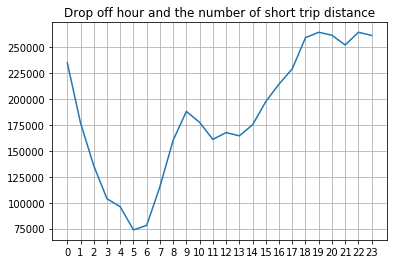

In [187]:
plt.title('Drop off hour and the number of short trip distance')
plt.xticks(drop_off_hour_short_trip_distance1)
plt.plot(drop_off_hour_short_trip_distance1, count_short_trip_distance1)
plt.grid(True)

In [188]:
# long trip
def drop_off_long_trip_distance(s):
    t = s.split(",")
    drop_off_long_trip_datetime = t[2]
    drop_off_long_trip_time = drop_off_long_trip_datetime.split(" ")[1]
    drop_off_long_trip_hour = int(drop_off_long_trip_time.split(":")[0])
    long_trip_distance = float(t[10])
    return (drop_off_long_trip_hour, long_trip_distance)

In [189]:
dropoff_hour_long_trip_distance1 = taxi.map(drop_off_long_trip_distance).filter(lambda x: x[1] >= 30).reduceByKey(lambda a,b:a+b).sortByKey(ascending=True)

In [190]:
print dropoff_hour_long_trip_distance1.collect()

[(0, 1441.63), (1, 721.26), (2, 876.4800000000001), (3, 1087.85), (4, 721.46), (5, 255.54), (6, 278.24), (7, 201.91), (8, 856.6300000000001), (9, 788.78), (10, 781.5699999999999), (11, 618.09), (12, 894.85), (13, 669.3399999999999), (14, 781.55), (15, 579.08), (16, 1104.32), (17, 830.51), (18, 1009.69), (19, 946.0), (20, 666.6800000000001), (21, 1130.1), (22, 1553.76), (23, 1100.99)]


In [192]:
# long trip
count_long_trip_distance1 = list()
drop_off_hour_long_trip_distance1 = list()
for i in dropoff_hour_long_trip_distance1.map(lambda x: x[1]).collect():
    v = float(i)
    count_long_trip_distance1.append(v)    
for i in dropoff_hour_long_trip_distance1.map(lambda x: x[0]).collect():
    v = float(i)
    drop_off_hour_long_trip_distance1.append(v)

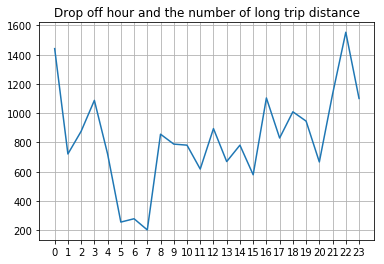

In [193]:
plt.title('Drop off hour and the number of long trip distance')
plt.xticks(drop_off_hour_long_trip_distance1)
plt.plot(drop_off_hour_long_trip_distance1, count_long_trip_distance1)
plt.grid(True)

# Part2 Data Frame -> we created separate files for data frame so please check the second one! This files are so big and it run slowly.

In [196]:
### Input data
sc = ss.sparkContext
#taxi = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09_small.csv")
header = sc.textFile("/scratch/ISE495/taxi_data/header.txt")
taxi = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09.csv")

In [197]:
for i in taxi.take(10):
    print i

2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979484558105469,40.684955596923828,-73.97943115234375,40.685020446777344,1,.00,7.8,0,0,1.95,0,,0,9.75,1,2
2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010795593261719,40.912216186523438,-74.010780334472656,40.912212371826172,1,.00,45,0,0,0,0,,0,45,1,2
2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921409606933594,40.766708374023438,-73.914413452148438,40.764686584472656,1,.59,4,0.5,0.5,0.5,0,,0.3,5.8,1,1
2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.92138671875,40.766677856445313,-73.931427001953125,40.771583557128906,1,.74,5,0.5,0.5,0,0,,0.3,6.3,2,1
2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482482910156,40.714046478271484,-73.944412231445313,40.714729309082031,1,.61,5,0.5,0.5,0,0,,0.3,6.3,2,1
2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297241210938,40.808185577392578,-73.937667846679688,40.821197509765625,1,1.07,5.5,0.5,0.5,1.36,0,,0.3,8.16,1,1
2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.8908767700

In [198]:
for i in header.take(5):
    print i

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type


In [199]:
print header.map(lambda l:l.split(","))

PythonRDD[500] at RDD at PythonRDD.scala:48


In [200]:
splitTaxi = taxi.map(lambda l: l.split(","))

In [201]:
print splitTaxi.take(3)

[[u'2', u'2015-09-01 00:02:34', u'2015-09-01 00:02:38', u'N', u'5', u'-73.979484558105469', u'40.684955596923828', u'-73.97943115234375', u'40.685020446777344', u'1', u'.00', u'7.8', u'0', u'0', u'1.95', u'0', u'', u'0', u'9.75', u'1', u'2'], [u'2', u'2015-09-01 00:04:20', u'2015-09-01 00:04:24', u'N', u'5', u'-74.010795593261719', u'40.912216186523438', u'-74.010780334472656', u'40.912212371826172', u'1', u'.00', u'45', u'0', u'0', u'0', u'0', u'', u'0', u'45', u'1', u'2'], [u'2', u'2015-09-01 00:01:50', u'2015-09-01 00:04:24', u'N', u'1', u'-73.921409606933594', u'40.766708374023438', u'-73.914413452148438', u'40.764686584472656', u'1', u'.59', u'4', u'0.5', u'0.5', u'0.5', u'0', u'', u'0.3', u'5.8', u'1', u'1']]


In [202]:
taxiTuples = splitTaxi.map(lambda p: (p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9], p[10], p[11],
                                     p[12], p[13], p[14], p[15], p[16], p[17], p[18],p[19],p[20]))

In [203]:
print taxiTuples.take(1)

[(u'2', u'2015-09-01 00:02:34', u'2015-09-01 00:02:38', u'N', u'5', u'-73.979484558105469', u'40.684955596923828', u'-73.97943115234375', u'40.685020446777344', u'1', u'.00', u'7.8', u'0', u'0', u'1.95', u'0', u'', u'0', u'9.75', u'1', u'2')]


In [204]:
from pyspark.sql.types import *

splitTaxi = taxi.map(lambda l: l.split(","))
# Each line is converted to a tuple.
taxiTuples = splitTaxi.map(lambda p: (p[0], p[1], p[2], p[3], p[4], float(p[5]), float(p[6]), float(p[7]), 
                                      float(p[8]), p[9], float(p[10]), float(p[11]),
                                     p[12], p[13], float(p[14]), p[15], p[16], p[17], float(p[18]),
                                      p[19],p[20]))

# The schema is encoded in a string.
fields = [StructField("VendorID", StringType(), True),
          StructField("lpep_pickup_datetime", StringType(), True),
          StructField("Lpep_dropoff_datetime", StringType(), True),
          StructField("Store_and_fwd_flag", StringType(), True),
          StructField("RateCodeID", StringType(), True),
          StructField("Pickup_longitude", FloatType(), True),
          StructField("Pickup_latitude", FloatType(), True),
          StructField("Dropoff_longitude", FloatType(), True),
          StructField("Dropoff_latitude", FloatType(), True),
          StructField("Passenger_count", StringType(), True),
          StructField("Trip_distance", FloatType(), True),
          StructField("Fare_amount", FloatType(), True),
          StructField("Extra", StringType(), True),
          StructField("MTA_tax", StringType(), True),
          StructField("Tip_amount", FloatType(), True),
          StructField("Tolls_amount", StringType(), True),
          StructField("Ehail_fee", StringType(), True),
          StructField("improvement_surcharge", StringType(), True),
          StructField("Total_amount", FloatType(), True),
          StructField("Payment_type", StringType(), True),
          StructField("Trip_type", StringType(), True),
         ]
schema = StructType(fields)

taxiDF = ss.createDataFrame(taxiTuples, schema)
print taxiDF.show(2)
taxiDF.printSchema()

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|       2| 2015-09-01 00:02:34|  2015-09-01 00:02:38|                 N|         5|      -73.979485|

In [205]:
taxiDF.count()

1494926

In [206]:
print taxiDF.columns ## Column Names
print "Row Count: ", taxiDF.count() ## Row Count
print "Column Count: ", len(taxiDF.columns) ## Column Count

['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type']
Row Count:  1494926
Column Count:  21


In [207]:
len(taxiDF.columns), taxiDF.columns

(21,
 ['VendorID',
  'lpep_pickup_datetime',
  'Lpep_dropoff_datetime',
  'Store_and_fwd_flag',
  'RateCodeID',
  'Pickup_longitude',
  'Pickup_latitude',
  'Dropoff_longitude',
  'Dropoff_latitude',
  'Passenger_count',
  'Trip_distance',
  'Fare_amount',
  'Extra',
  'MTA_tax',
  'Tip_amount',
  'Tolls_amount',
  'Ehail_fee',
  'improvement_surcharge',
  'Total_amount',
  'Payment_type',
  'Trip_type'])

In [208]:
taxiDF.describe().show()

+-------+------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+---------+---------------------+------------------+------------------+------------------+
|summary|          VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|        RateCodeID|  Pickup_longitude|   Pickup_latitude| Dropoff_longitude|  Dropoff_latitude|   Passenger_count|     Trip_distance|       Fare_amount|              Extra|            MTA_tax|        Tip_amount|       Tolls_amount|Ehail_fee|improvement_surcharge|      Total_amount|      Payment_type|         Trip_type|
+-------+------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+------------

In [209]:
taxiDF.describe('VendorID').show()

+-------+-------------------+
|summary|           VendorID|
+-------+-------------------+
|  count|            1494926|
|   mean| 1.7820447299732562|
| stddev|0.41285697803709925|
|    min|                  1|
|    max|                  2|
+-------+-------------------+



In [210]:
taxiDF.select('Pickup_longitude','Pickup_latitude').show(5)

+----------------+---------------+
|Pickup_longitude|Pickup_latitude|
+----------------+---------------+
|      -73.979485|      40.684956|
|      -74.010796|      40.912216|
|       -73.92141|       40.76671|
|       -73.92139|      40.766678|
|       -73.95548|      40.714046|
+----------------+---------------+
only showing top 5 rows



In [211]:
# Column Data Typeb
taxiDF.dtypes

[('VendorID', 'string'),
 ('lpep_pickup_datetime', 'string'),
 ('Lpep_dropoff_datetime', 'string'),
 ('Store_and_fwd_flag', 'string'),
 ('RateCodeID', 'string'),
 ('Pickup_longitude', 'float'),
 ('Pickup_latitude', 'float'),
 ('Dropoff_longitude', 'float'),
 ('Dropoff_latitude', 'float'),
 ('Passenger_count', 'string'),
 ('Trip_distance', 'float'),
 ('Fare_amount', 'float'),
 ('Extra', 'string'),
 ('MTA_tax', 'string'),
 ('Tip_amount', 'float'),
 ('Tolls_amount', 'string'),
 ('Ehail_fee', 'string'),
 ('improvement_surcharge', 'string'),
 ('Total_amount', 'float'),
 ('Payment_type', 'string'),
 ('Trip_type', 'string')]

In [212]:
# Descriptive Statistic
taxiDF.describe().show()

+-------+------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+---------+---------------------+------------------+------------------+------------------+
|summary|          VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|        RateCodeID|  Pickup_longitude|   Pickup_latitude| Dropoff_longitude|  Dropoff_latitude|   Passenger_count|     Trip_distance|       Fare_amount|              Extra|            MTA_tax|        Tip_amount|       Tolls_amount|Ehail_fee|improvement_surcharge|      Total_amount|      Payment_type|         Trip_type|
+-------+------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+------------

In [213]:
#Showing only a data
taxiDF.show(1)

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|       2| 2015-09-01 00:02:34|  2015-09-01 00:02:38|                 N|         5|      -73.979485|

In [214]:
#from pyspark.sql.functions import col, when

In [215]:
# def NY_NJ(s):
#     t = s.split(",")
#     y = float(t[6])
#     x = float(t[5])
#     b = float(t[8])
#     a = float(t[7])
#     if y > 1.323942*x + 138.669195:
#         pickup = "NJ"
#     else:
#         pickup = "NYC"
#     if b > 1.323942*a + 138.669195:
#         dropoff= "NJ"
#     else:
#         dropoff = "NYC"
#     return pickup, dropoff

In [216]:
# df = df_with_test_column.withColumn('game_winner', when( (col("homeFinalRuns") > col("awayFinalRuns")), 
#                                                         col("homeFinalRuns") ))

In [217]:
#y > 1.323942 * col('Pickup_longitude') + 138.669195

In [218]:
#df.withColumn('Y', when(col('tot_amt') < -50., 1).otherwise(0)).show()

In [219]:
taxi=taxiDF.toPandas()

In [220]:
taxi.head()

VendorID lpep_pickup_datetime Lpep_dropoff_datetime Store_and_fwd_flag  \
0        2  2015-09-01 00:02:34   2015-09-01 00:02:38                  N   
1        2  2015-09-01 00:04:20   2015-09-01 00:04:24                  N   
2        2  2015-09-01 00:01:50   2015-09-01 00:04:24                  N   
3        2  2015-09-01 00:02:36   2015-09-01 00:06:42                  N   
4        2  2015-09-01 00:00:14   2015-09-01 00:04:20                  N   

  RateCodeID  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0          5        -73.979485        40.684956         -73.979431   
1          5        -74.010796        40.912216         -74.010780   
2          1        -73.921410        40.766708         -73.914413   
3          1        -73.921387        40.766678         -73.931427   
4          1        -73.955482        40.714046         -73.944412   

   Dropoff_latitude Passenger_count    ...     Fare_amount  Extra MTA_tax  \
0         40.685020               1    ...             7.8      0       0   
1         40.912212               1    ...            45.0      0       0   
2         40.764687               1    ...             4.0    0.5     0.5   
3         40.771584               1    ...             5.0    0.5     0.5   
4         40.714729               1    ...             5.0    0.5     0.5   

  Tip_amount  Tolls_amount Ehail_fee improvement_surcharge Total_amount  \
0       1.95             0                               0         9.75   
1       0.00             0                               0        45.00   
2       0.50             0                             0.3         5.80   
3       0.00             0                             0.3         6.30   
4       0.00             0                             0.3         6.30   

   Payment_type Trip_type  
0             1         2  
1             1         2  
2             1         1  
3             2         1  
4             2         1  

[5 rows x 21 columns]

Since the Hudson River, which is the boundary of New Jersey and NYC in this area, is quite straight, we can use a line to model this natural boundary. The approximated line in latitude (y) and longitude (x) can be represented as
y = 1.323942 ∗ x + 138.669195.
If a location satisfies y > 1.323942 ∗ x + 138.669195, it?s in New Jersey. If a location satisfies y < 1.323942 ∗ x + 138.669195, it?s in Manhattan. After such processing, we can get Figure-2. In this way, we can better utilize the pick-up and drop-off latitude-longitude data.

In [25]:
df = ss.createDataFrame([
    (0, [1, 2, 5]),
    (1, [1, 2, 3, 5]),
    (2, [1, 2])
], ["id", "items"])

In [26]:
from pyspark.ml.fpm import FPGrowth


fpGrowth = FPGrowth(itemsCol="items", minSupport=0.5, minConfidence=0.6)
model = fpGrowth.fit(df)

# Display frequent itemsets.
model.freqItemsets.show()

# Display generated association rules.
model.associationRules.show()

# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(df).show()

+---------+----+
|    items|freq|
+---------+----+
|      [5]|   2|
|   [5, 1]|   2|
|[5, 1, 2]|   2|
|   [5, 2]|   2|
|      [2]|   3|
|      [1]|   3|
|   [1, 2]|   3|
+---------+----+

+----------+----------+------------------+
|antecedent|consequent|        confidence|
+----------+----------+------------------+
|       [5]|       [1]|               1.0|
|       [5]|       [2]|               1.0|
|    [1, 2]|       [5]|0.6666666666666666|
|    [5, 2]|       [1]|               1.0|
|    [5, 1]|       [2]|               1.0|
|       [2]|       [5]|0.6666666666666666|
|       [2]|       [1]|               1.0|
|       [1]|       [5]|0.6666666666666666|
|       [1]|       [2]|               1.0|
+----------+----------+------------------+

+---+------------+----------+
| id|       items|prediction|
+---+------------+----------+
|  0|   [1, 2, 5]|        []|
|  1|[1, 2, 3, 5]|        []|
|  2|      [1, 2]|       [5]|
+---+------------+----------+



In [221]:
sc.stop()

In [222]:
ss.stop()